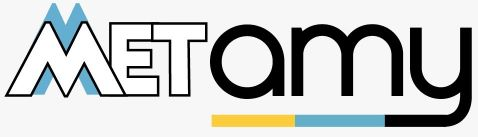

# DATA ANALYSIS WITH PYTHON 

# Data Analysis with Python Capstone Project

# Netflix

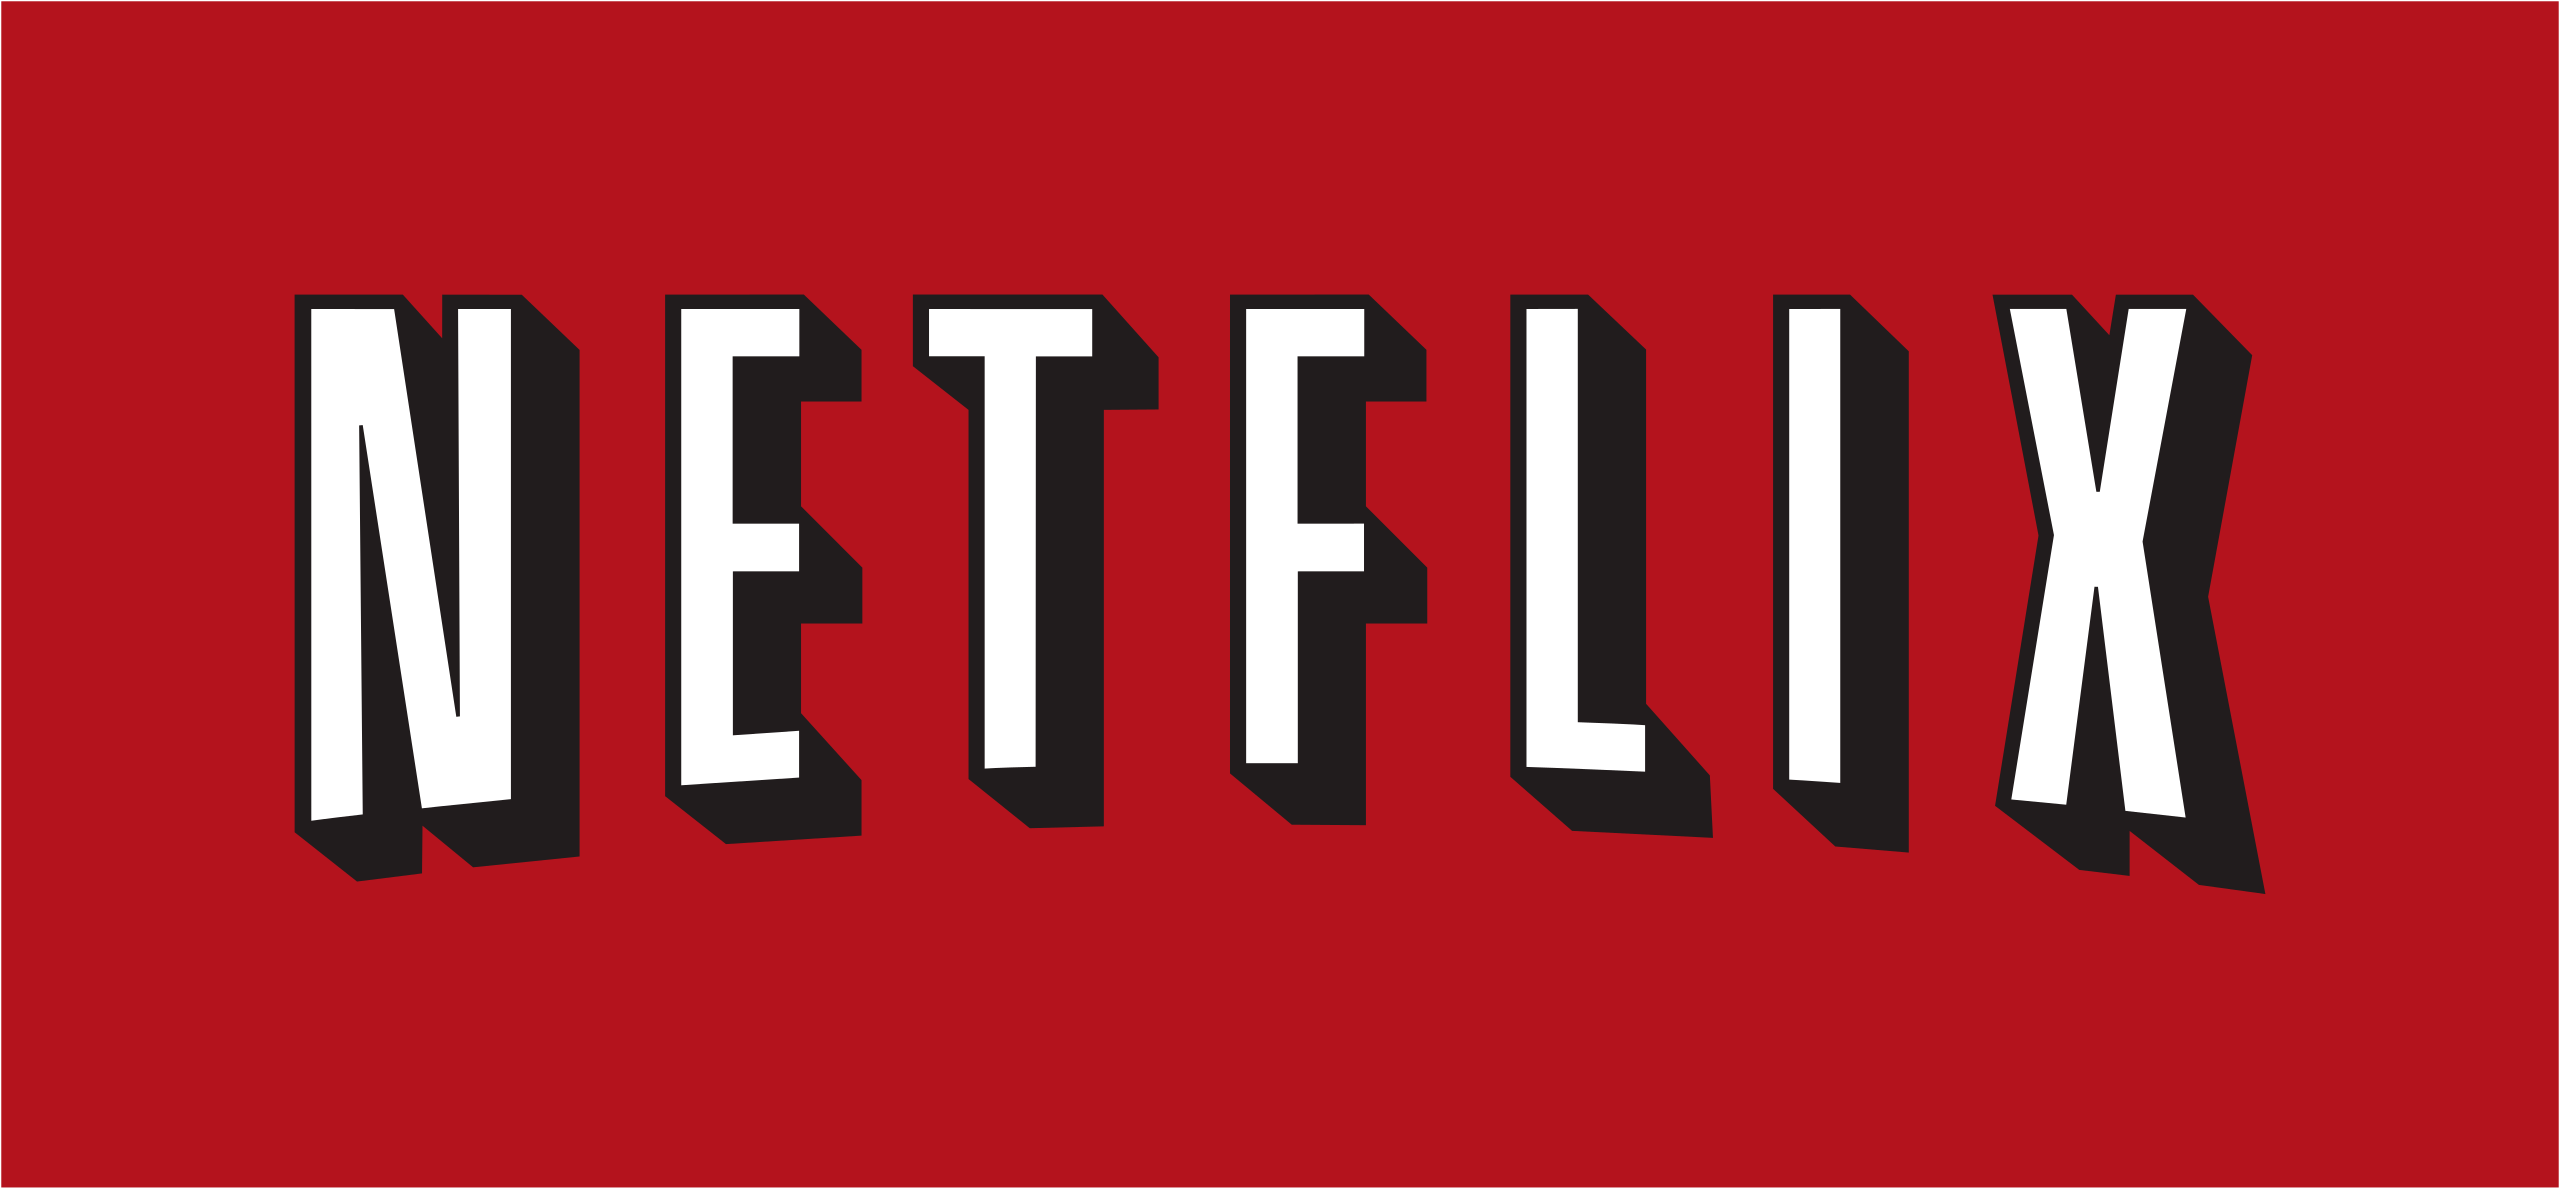

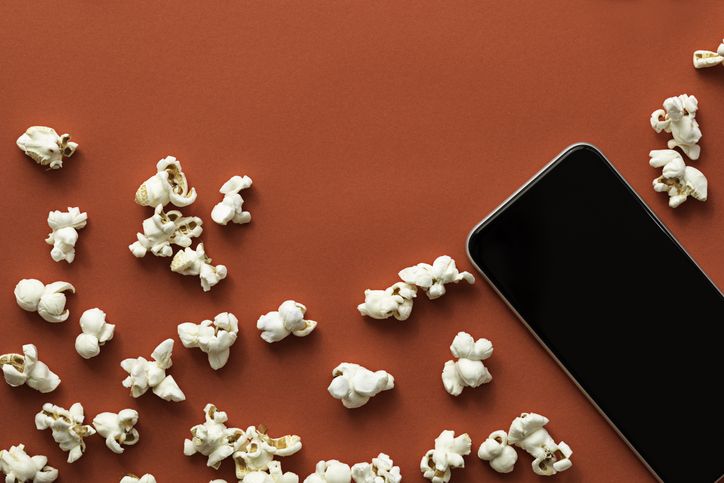

## Information on the Data Set

**This dataset contains more than 8,500 Netflix movies and TV shows, including cast members, duration, and genre.**<br><br>
**It contains titles added as recently as late September 2021.**

**Not sure where to begin? Scroll to the bottom to find challenges!**

**Netflix! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.**

**A talent agency has hired you with your team to analyze patterns in the professional relationships of cast members and directors. You can limit the actors to the first four names listed in cast. The client is interested in any insights you can derive from your Netflix network analysis, such as actor/actor and actor/director pairs that work most closely together, most popular actors and directors to work with, and graph differences over time. You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.**


**Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your data manipulation skills. One of your friend in your team has performed an initial analysis and said that  the average duration of movies has been declining. He believes if your team can explain some of the factors that may be contributing to the shortening movie lengths.**


**You have been supplied with the dataset netflix_data.csv , along with the following table detailing the column names and descriptions:**

---

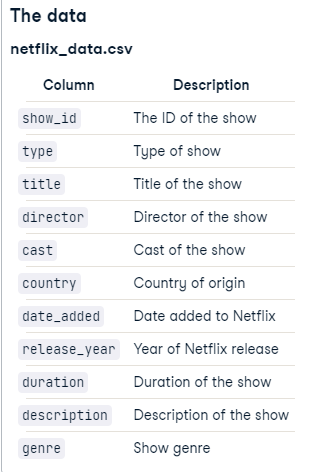

**Your friend suspects that movies are getting shorter and they've found some initial evidence of this. Having peaked your interest, you will perform exploratory data analysis on the "netflix_data.csv" to understand what may be contributing to movies getting shorter over time. Your analysis may follow the following steps as a starting point:**<br><br>




- Investigate and subset the Netflix data by "Movie" type, keeping only the columns "title", "country", "genre", "release_year", "duration", saving this into a new DataFrame called netflix_movies.

- Filter netflix_movies to find the movies that are shorter than 60 minutes, and inspect the result to find possible contributing factors.

- Using a for loop, assign colors of your choice to four genre groups from netflix_movies, ("Children", "Documentaries", "Stand-Up", and "Other") saving them to a colors list, and use this to initialize a figure object and create a scatter plot for movie duration by release year using the labels "Release year" for the x-axis, "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release".


- After inspecting the plot, answer the question "Are we certain that movies are getting shorter?" by assigning either "yes", "no", or "maybe" to the variable answer.

**Again, your client is interested in any insights you can derive from data set. For instance, following analysis might be helpful:**<br><br>

- Replacing missing countries with "Not Specify", missing directors with "No Director", missing cast with "No Cast"


- How much variety exists in Netflix's offering? Base this on three variables: type, country, and listed_in.


- Has Netflix invested more in certain genres (see listed_in) in recent years? What about certain age groups (see ratings)?

In [1]:
# don't display warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import related libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

# in order to set the parameters that control the general style of the plots. 
plt.rcParams["figure.figsize"] = (10, 6)
sns.set_style("whitegrid")

# in order to set the value of the specified option.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# to set it "100" to display all rows in the dataframe
pd.set_option('display.max_rows', 100)

#  to set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
# fetch netflix_dataset file
df = pd.read_csv("netflix_dataset.csv", index_col=0)

In [4]:
# replica for df
df_copy = df.copy()

## <span class="burk">Getting to Know a Dataset</span>

### Initial Exploration

In [ ]:
# display first 5 record
df.head(5)

In [ ]:
# display last 5 record
df.tail(5)

In [ ]:
# display random 5 record
df.sample(5)

In [ ]:
# display dfs dimension
df.shape

In [ ]:
# display dfs columns name
df.columns

In [ ]:
# display dfs values
df.values

In [ ]:
# inquire information about dfs columns
df.info()

In [ ]:
# Generate descriptive statistics about dfs numeric columns
df.describe().T

In [ ]:
# Generate descriptive statistics about dfs categorical columns
df.describe(include = "O")

In [ ]:
# Generate descriptive statistics about dfs numeric and categorical columns
df.describe(include = "all")

In [ ]:
# It's very useful function that we design to check the data frame with some key factors. 
# It mostly gives very meaningful insights and todo tasks in the following.
# It does the checking DF column by column.

def check_dataframe(col):
    print("column name : ", col)
    print("--------------------------------")
    print("Percentage_of_Nulls        : ", "%", round(df[col].isnull().sum() * 100 /df.shape[0], 2))
    print("Num_of_Nulls               : ", df[col].isnull().sum())
    print("Num_of_Unique              : ", df[col].nunique())
    print("Type of the Column         : ", df[col].dtypes)
    print(df[col].value_counts(dropna = False))
    print(""*30)
    print("\n")

In [ ]:
# check columns with check_dataframe function
for col in df.columns:
    check_dataframe(col)

In [ ]:
# we have a dataset of 8807 records and 11 fields.
# there are duplicate and null records which they must be fixed.
# new fields can be derived.
# data_added and duration fields need to change their data type.

### Data Validation

In [ ]:
# display data type of fields dfs
df.dtypes

In [ ]:
# display records with the word "movie" in type field
df[df["type"].isin(["Movie"])]

In [ ]:
# display records that do not contain the word "movie" in type field
df[~df["type"].isin(["Movie"])]

In [ ]:
# return a Series containing counts of unique values
df.value_counts()

In [ ]:
# return containing counts of unique values at type field
df["type"].value_counts()

In [ ]:
# create type value count as pie plot
Type = df.groupby("type").size()
Type.plot(kind = "pie", title = "Distribution By Type", ylabel="", figsize=[10,6], shadow = True,
          autopct=lambda p:"{:.2f}%({:.0f})".format(p,(p/100)*Type.sum()))

# save pie plot as png
plt.savefig(fname="graphic1.png", transparent = True)

# show pie plot
plt.show()

In [ ]:
# we can see clearly that movie count more than tv show count
# observation 1: Netflix has hosted movies more than tv show

### Data Summarization

In [ ]:
# describe categorical data by type
df.groupby("type").describe(include = "O").T

In [ ]:
# observation 2: 
# there are repetitive record according to cast and director fields
# united states produces the most content
# the most movie added in January 1, 2020 and the most tv show added July 6, 2021
# most of the content on Netflix seems to be for adults

## <span class="burk">Data Cleaning and Imputation</span>

### Addressing with Missing Data

In [5]:
# show the sum of missing records by field
df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# how many of the null records are expendable?
threshold = len(df)*0.05
threshold

440.35

In [7]:
# fill in fields director, cast and country with acceptable data
values = {"director": "No Director", "cast": "No Cast", "country": "Not Specify"}
df.fillna(value = values, inplace = True) 

In [8]:
# delete the remaining missing rows
df = df.dropna()

In [9]:
# check again for null record
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
# count the data in column description
df["description"].value_counts()

Paranormal activity at a lush, abandoned property alarms a group eager to redevelop the site, but the eerie events may not be as unearthly as they think.    4
Multiple women report their husbands as missing but when it appears they are looking for the same man, a police officer traces their cryptic connection.     3
Challenged to compose 100 songs before he can marry the girl he loves, a tortured but passionate singer-songwriter embarks on a poignant musical journey.    3
A surly septuagenarian gets another chance at her 20s after having her photo snapped at a studio that magically takes 50 years off her life.                 3
As a series of murders hit close to home, a video game designer with post-traumatic stress must confront her demons, or risk becoming their victim.          2
                                                                                                                                                            ..
Exhausted with his mother’s failed attempts at

In [11]:
# show repetitive data in field description
df[df["description"].duplicated()]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s80,Movie,Tughlaq Durbar (Telugu),Delhiprasad Deenadayalan,"Vijay Sethupathi, Parthiban, Raashi Khanna",Not Specify,"September 11, 2021",2021,TV-14,145 min,"Comedies, Dramas, International Movies",A budding politician has devious plans to rise...
s238,Movie,Boomika (Hindi),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Not Specify,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
s239,Movie,Boomika (Malayalam),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Not Specify,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
s240,Movie,Boomika (Telugu),Rathindran R Prasad,"Aishwarya Rajesh, Vidhu, Surya Ganapathy, Madh...",Not Specify,"August 23, 2021",2021,TV-14,122 min,"Horror Movies, International Movies, Thrillers","Paranormal activity at a lush, abandoned prope..."
s852,Movie,99 Songs (Tamil),No Director,No Cast,Not Specify,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
s853,Movie,99 Songs (Telugu),No Director,No Cast,Not Specify,"May 21, 2021",2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals",Challenged to compose 100 songs before he can ...
s1654,Movie,Andhakaaram,V Vignarajan,"Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...",India,"November 24, 2020",2020,TV-14,171 min,"Horror Movies, International Movies, Thrillers","As a blind librarian, dispirited cricketer and..."
s1987,Movie,Nee Enge En Anbe,Sekhar Kammula,"Nayantara, Vaibhav Reddy, Pasupathy, Harshvard...",Not Specify,"September 17, 2020",2014,TV-14,137 min,"International Movies, Thrillers",As a woman scours Hyderabad for her missing hu...
s2336,Movie,Seven (Telugu),No Director,No Cast,Not Specify,"June 26, 2020",2019,TV-14,116 min,"Dramas, International Movies, Romantic Movies",Multiple women report their husbands as missin...


In [12]:
# finding how many repeating data in a field description
df["description"].duplicated().sum()

32

In [13]:
# delete repeating data in a field description
df.drop_duplicates(subset= "description", inplace = True)

### Converting and Analyzing Categorical Data

In [14]:
# take a look at second record to cast field
df["cast"][1]

'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'

In [15]:
# try your luck to get players
df["cast"].values[0:5][1].split(",")[0:]

['Ama Qamata',
 ' Khosi Ngema',
 ' Gail Mabalane',
 ' Thabang Molaba',
 ' Dillon Windvogel',
 ' Natasha Thahane',
 ' Arno Greeff',
 ' Xolile Tshabalala',
 ' Getmore Sithole',
 ' Cindy Mahlangu',
 ' Ryle De Morny',
 ' Greteli Fincham',
 ' Sello Maake Ka-Ncube',
 ' Odwa Gwanya',
 ' Mekaila Mathys',
 ' Sandi Schultz',
 ' Duane Williams',
 ' Shamilla Miller',
 ' Patrick Mofokeng']

In [16]:
# now let's take the first 4 players in each row of the whole field
for _ in range(0,len(df)):
    if df["cast"][_] == "No Cast":
        continue
    else:
        df["cast"][_] = df["cast"].values[0:len(df)][_].split(", ")[0:]

In [17]:
# delete space and comma in field country
df["country"] = df["country"].str.rstrip(", ")
df["country"] = df["country"].str.lstrip(", ")

In [18]:
# derive a new field called genre based on the records in field listed_in
genre_list = ["Children", "Documentaries", "Stand-Up"]
for genre in genre_list:
    df.loc[df["listed_in"].str.contains(genre, case=False), "genre"] = genre

In [19]:
# fill missing value in field genre with "other" 
df["genre"].fillna("Other", inplace=True)

In [20]:
# derive a new field called rating_age based on the records in field rating
mapping = {"TV-Y":"Kids","TV-G":"Kids","G":"Kids", 
           "TV-PG":"Older Kids","TV-Y7-FV":"Older Kids","TV-Y7":"Older Kids","PG":"Older Kids",
           "TV-14":"Teen", "PG-13":"Teen", 
           "TV-MA":"Adults","R":"Adults","NC-17":"Adults",
           "NR":"Not Rated","UR":"Not Rated"}
df["rating_age"] = df["rating"].replace(mapping)

In [ ]:
# now we have more acceptable and actionable categorical data

### Working with Numeric Data

In [21]:
# remove unwanted characters from field duration
df["duration"]=df["duration"].str.strip("Sseaonmin ")

In [22]:
# Convert the data type of field duration to integer
df["duration"] = pd.to_numeric(df["duration"])

In [23]:
# Convert the data type of field date_added to datetime
df["date_added"] = pd.to_datetime(df["date_added"])

In [24]:
# derive a new field called added_year based on the field date_added
df["added_year"]=df.date_added.dt.year

In [25]:
# create new field called production to see which production it belongs to
# if the year of publication and the year of addition to Netflix are equal, we assume that this content belongs to Netflix
# our assumption looks correct when we check a few random sample. but it is important that this assumption may wrong
df["production"] = df.apply(lambda x: "N" if x["added_year"] == x["release_year"] else "O", axis=1)

In [ ]:
# now we have more acceptable and actionable numeric data

### Handling Outliers

In [ ]:
# since the duration field of TV Show is season and the duration field of movies is minutes,
# we will examine them as two different dataframes.

In [26]:
# create dataframes containing only movie records
netflix_movies_only = df[df["type"] == "Movie"]

In [27]:
# create dataframes containing only TV Show records
netflix_tvshow_only = df[df["type"] == "TV Show"]

In [28]:
# create a function to display outlier
def extract_outliers_from_boxplot(array):
    # Get IQR
    q1 = np.quantile(array, 0.25)
    q3 = np.quantile(array, 0.75)
    med = np.median(array)
    
    # finding the iqr region
    iqr = q3-q1
    
    # iqr = stats.iqr(array)
    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    
    outliers = array[(array <= lower_bound) | (array >= upper_bound)]
    print("Outliers within the box plot are:")
    return outliers

In [29]:
# using function to display possible outliers for movies
extract_outliers_from_boxplot(netflix_movies_only["duration"])

Outliers within the box plot are:


show_id
s23      161
s25      166
s46       23
s72       13
s74      182
        ... 
s8764     45
s8765    191
s8771    171
s8789    157
s8803    158
Name: duration, Length: 444, dtype: int64

<AxesSubplot:xlabel='duration'>

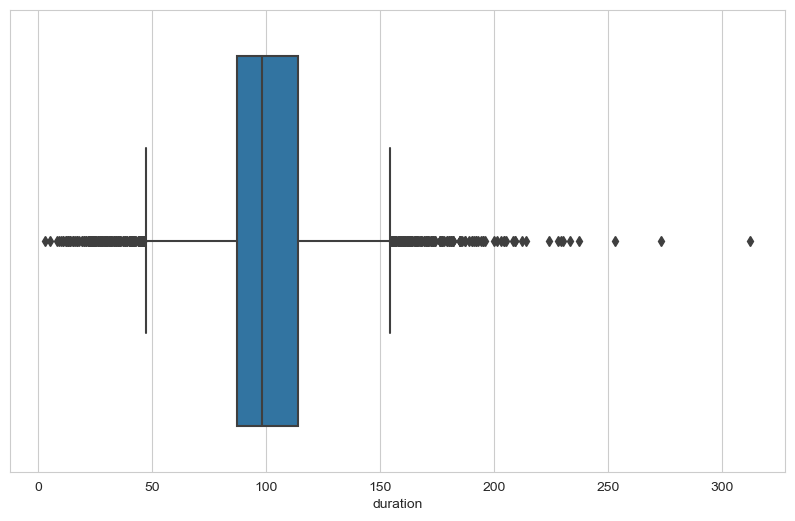

In [30]:
# demonstrate possible outliers for movie with boxplot
sns.boxplot(netflix_movies_only["duration"])

In [31]:
# this graph above the line shows that movies with more than 160 minutes and less than 50 minutes as outliers
# movies can last more than 160 minutes
# usually movies last longer than 60 minutes, so we should check movies that last less than 60 minutes

<AxesSubplot:>

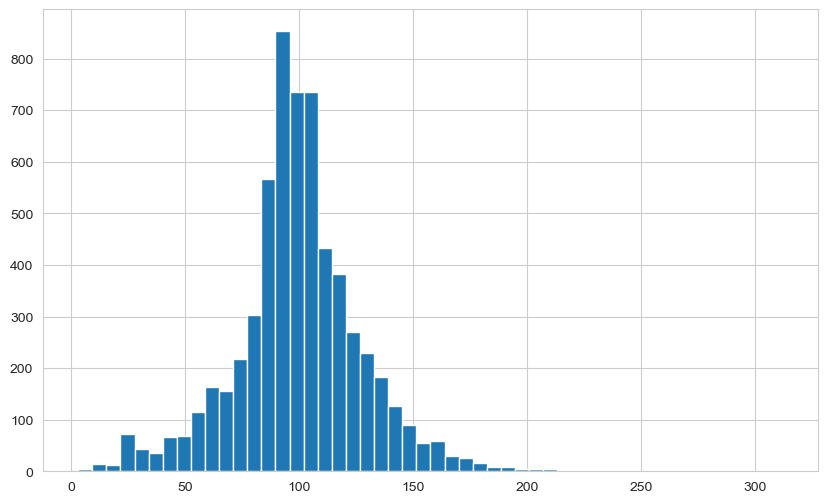

In [32]:
# demonstrate possible outliers for movie with hist
netflix_movies_only["duration"].hist(bins=50)

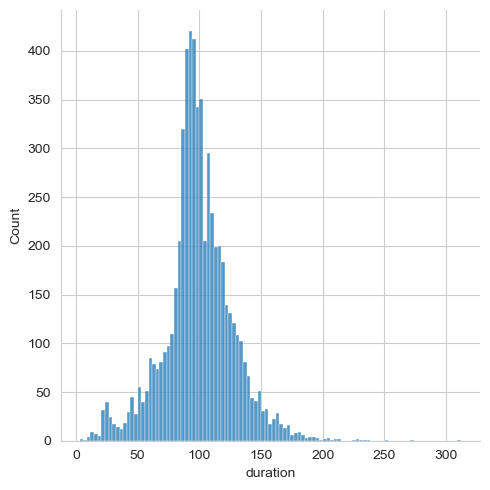

In [33]:
# demonstrate possible outliers for movie with displot
sns.displot(netflix_movies_only["duration"])

In [ ]:
# observation 3: this graphs above the line looks like it has a normal distribution (Gauss Distribution)
# the normal distribution represents the mean, mode and median values being close to each other
# and we can clearly see that there is more aggregation in the number of movies less than 60 minutes

In [ ]:
# Another way to test the normal distribution is to look at the kurtosis and skewness coefficients

In [34]:
# netflix_movies_only skewness
netflix_movies_only["duration"].skew()

0.2039406934220291

In [35]:
# netflix_movies_only kurtosis
netflix_movies_only["duration"].kurt()

2.3278196614227458

In [ ]:
# movies coefficient of skewness is 0.20 and coefficient of kurtosis is 2.32
# which means it's slightly skewed to the left and pointed.

In [36]:
# using function to display possible outliers for tvshow
extract_outliers_from_boxplot(netflix_tvshow_only["duration"])

Outliers within the box plot are:


show_id
s9       9
s16      4
s22      5
s56      6
s66      6
        ..
s8542    4
s8558    7
s8654    4
s8711    8
s8727    5
Name: duration, Length: 254, dtype: int64

<AxesSubplot:xlabel='duration'>

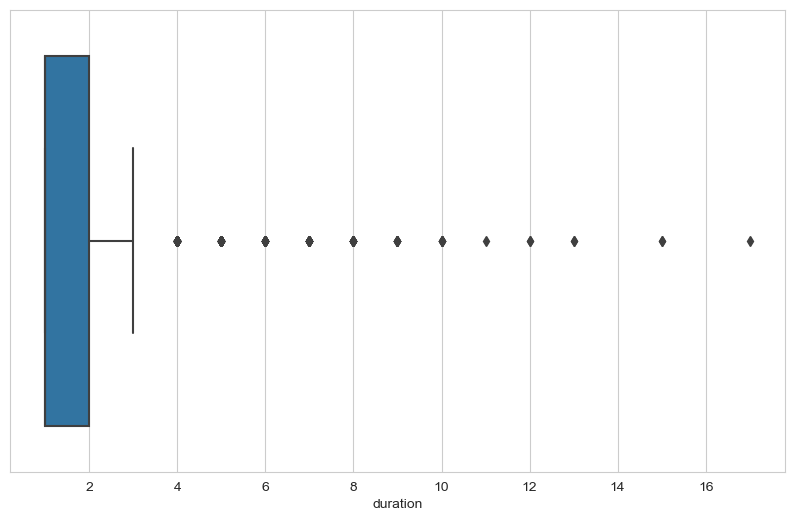

In [37]:
# demonstrate possible outliers for movies with hist
sns.boxplot(netflix_tvshow_only["duration"])

<AxesSubplot:>

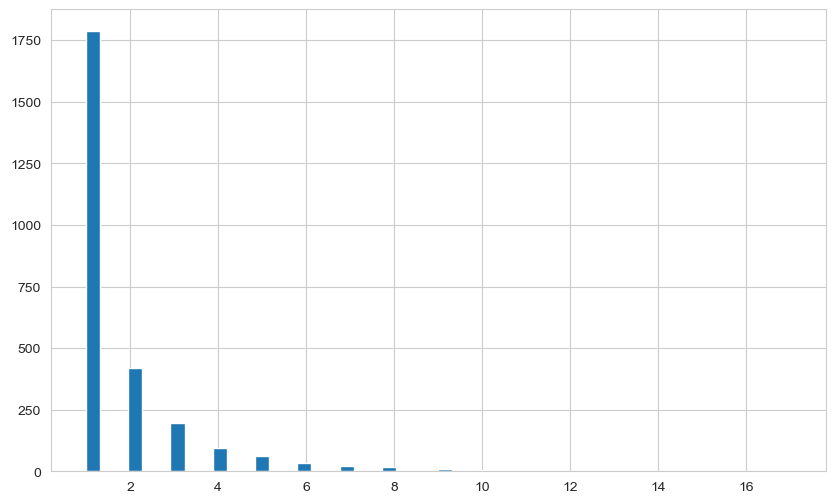

In [38]:
# demonstrate possible outliers for tvshow with hist
netflix_tvshow_only["duration"].hist(bins=50)

In [ ]:
# we cannot reach a correct conclusion by looking at the graphs above the line beacuse of tvshow duration is season
# lets find out tvshow median and mode

In [39]:
# finding the most recurring value
netflix_tvshow_only["duration"].mode()

0    1
Name: duration, dtype: int64

In [40]:
# finding the value in the middle
netflix_tvshow_only["duration"].median()

1.0

In [ ]:
# observation 4: according to the statistics above the line tv show duration last proximately 1 season

## <span class="burk">Relationship in Data</span>

### Patterns Over Time

### Correlation

In [41]:
# finding correlation among release_date, added_year and duration for movies
corr_matrix_movies = netflix_movies_only.corr()
corr_matrix_movies

,release_year,duration,added_year
release_year,1.000,-0.209,0.037
duration,-0.209,1.000,0.123
added_year,0.037,0.123,1.000


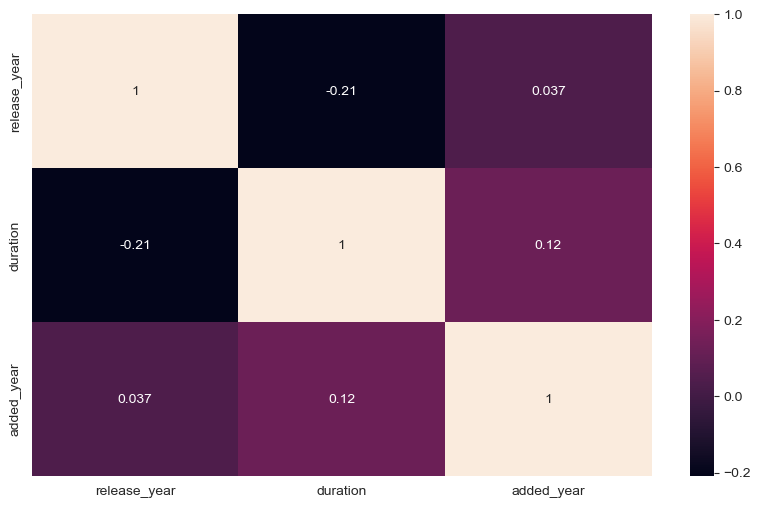

In [42]:
# create heatmap for correlation among release_date, added_year and duration
sns.heatmap(corr_matrix_movies,  annot=True)
plt.show()

In [ ]:
# there is a positive and weak correlation between release_year and added_year
# there is a negative and weak correlation between release_year and duration
# there is a positive and weak correlation between added_year and duration
# observation 5: release_year and added_year increase and decrease in the same direction, 
# while release_year and duration increase and decrease in the opposite direction

In [43]:
# finding correlation among release_date, added_year and duration for tv show
corr_matrix_tv = netflix_tvshow_only.corr()
corr_matrix_tv

,release_year,duration,added_year
release_year,1.000,-0.081,0.388
duration,-0.081,1.000,0.042
added_year,0.388,0.042,1.000


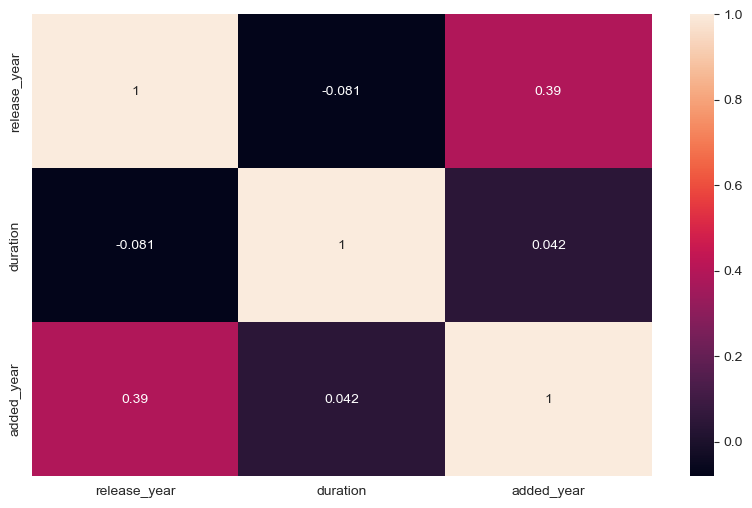

In [44]:
# create heatmap for correlation among release_date, added_year and duration
sns.heatmap(corr_matrix_tv,  annot=True)
plt.show()

In [ ]:
# there is a positive and weak correlation between release_year and added_year
# there is a negative and weak correlation between release_year and duration
# there is a positive and weak correlation between added_year and duration
# observation 6: release_year and added_year increase and decrease in the same direction, 
# while release_year and duration increase and decrease in the opposite direction

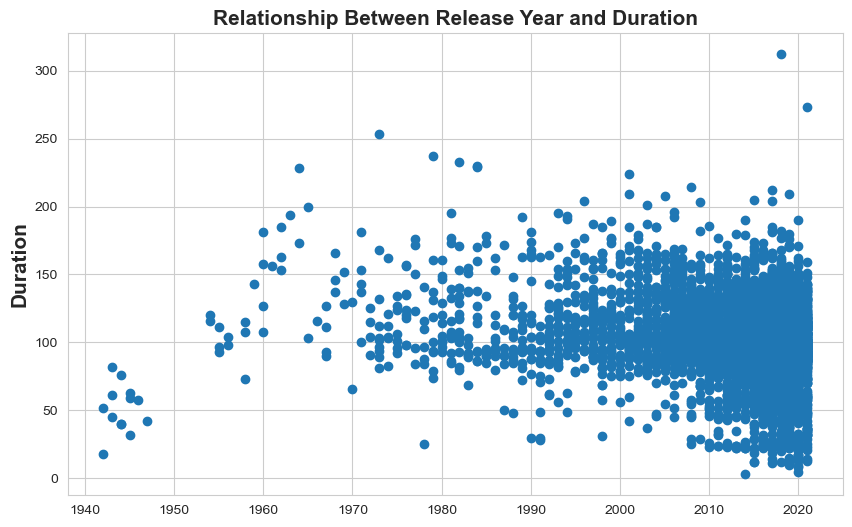

In [45]:
# let's create a scatter plot showing the relationship between release_year and duration
plt.scatter("release_year", "duration", data = netflix_movies_only)
plt.title("Relationship Between Release Year and Duration", fontweight ='bold', fontsize = 15)
plt.ylabel("Duration", fontweight ='bold', fontsize = 15)
plt.show()

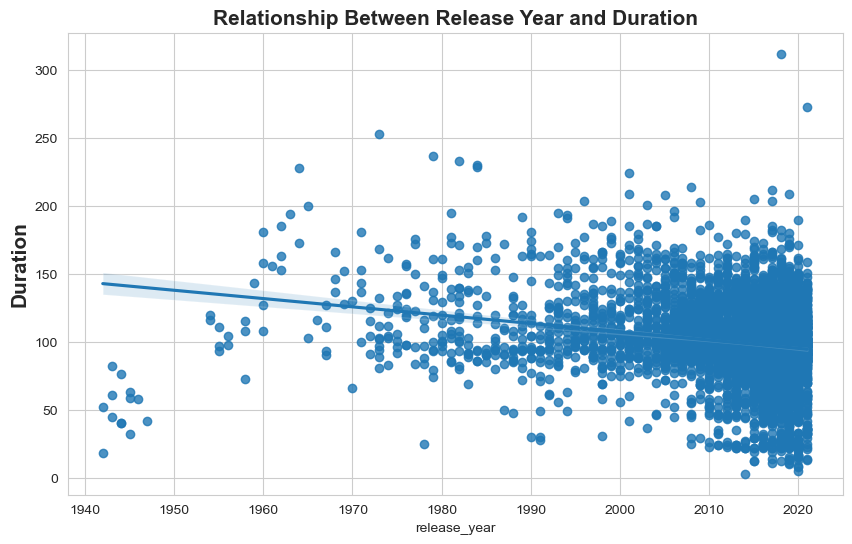

In [46]:
# let's create a regplot showing the relationship between release_year and duration
sns.regplot(x="release_year", y="duration", data = netflix_movies_only)
plt.title("Relationship Between Release Year and Duration", fontweight ='bold', fontsize = 15)
plt.ylabel("Duration", fontweight ='bold', fontsize = 15)
plt.show()

In [ ]:
# observation 7: according to the scatter plots above; the duration of the movies decreases according to the years

In [ ]:
# finding correlation among release_date, added_year and duration for movies added after 2016
corr_matrix_2016 = netflix_movies_2016.corr()
corr_matrix_2016

In [ ]:
# create heatmap for correlation among release_date, added_year and duration for movies added after 2016
sns.heatmap(corr_matrix_2016,  annot=True)
plt.show()

In [ ]:
# let's create a scatter plot showing the relationship between release_year and duration for movies added after 2016
plt.scatter("release_year", "duration", data = netflix_movies_2016)
plt.show()

In [ ]:
# let's create a scatter plot showing the relationship between added_year and duration for movies added after 2016
plt.scatter("added_year", "duration", data = netflix_movies_2016)
plt.show()

### Factor Relationships and Distributions

In [47]:
# investigate and subset the Netflix data by "Movie" type, 
# keeping only the columns "title", "country", "genre", "release_year", "duration"
# saving this into a new DataFrame called netflix_movies
netflix_movies = netflix_movies_only[["title","country","genre","release_year","duration"]]

In [48]:
# filter netflix_movies to find the movies that are shorter than 60 minutes
short_movies = netflix_movies[netflix_movies["duration"] < 60]

In [ ]:
# inspect the result to find possible contributing factors

In [49]:
# finding duration value count by country
short_movies.groupby("country")["duration"].value_counts()

country                        duration
Argentina                      49          1
                               51          1
                               58          1
Australia                      23          1
                               25          1
                                          ..
United States, Japan           59          2
United States, Mexico          25          1
                               30          1
                               38          1
United States, United Kingdom  55          1
Name: duration, Length: 193, dtype: int64

In [50]:
# finding duration value count by genre
short_movies.groupby("genre")["duration"].value_counts()

genre     duration
Children  46          17
          24          14
          23           9
          22           8
          25           8
                      ..
Stand-Up  28           1
          31           1
          42           1
          45           1
          48           1
Name: duration, Length: 138, dtype: int64

In [51]:
# finding duration value count by release_year
short_movies.groupby("release_year")["duration"].value_counts()

release_year  duration
1942          18          1
              52          1
1943          45          1
1944          40          2
1945          32          1
                         ..
2021          49          1
              52          1
              54          1
              55          1
              59          1
Name: duration, Length: 263, dtype: int64

<AxesSubplot:xlabel='Release Year', ylabel='Duration'>

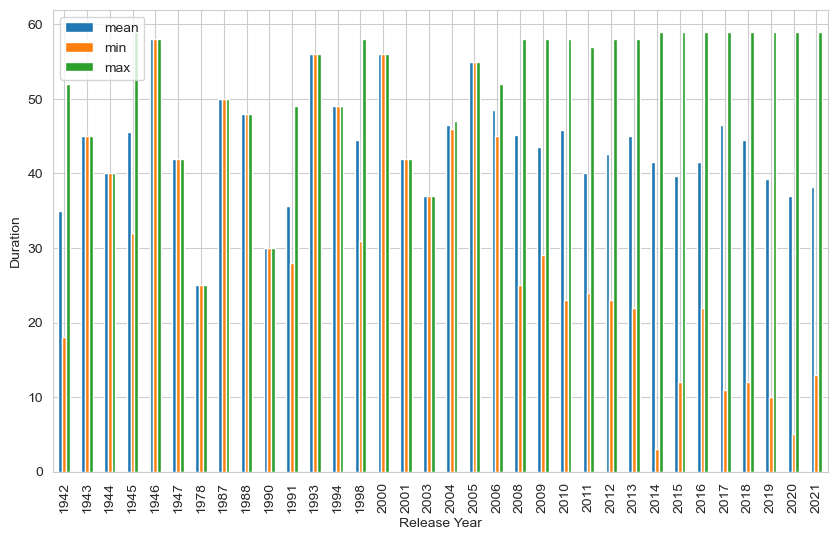

In [52]:
# finding duration mean, min, max by release year and demonstrate as a plot
short_movies.groupby("release_year")["duration"].agg(["mean","min","max"]).plot(kind = "bar", ylabel = "Duration", 
                                                                                xlabel = "Release Year")

In [ ]:
# observation 8: according to the release_year, minimum duration of the movies decreases
# while maximum and average durations increase

In [53]:
# finding duration mean, min, max and count by country
short_movies.groupby("country")["duration"].agg(["mean","min","max","count"])

,mean,min,max,count
country,,,,
Argentina,52.667,49,58,3
Australia,24.000,23,25,2
"Australia, Canada",51.000,51,51,1
Brazil,49.667,44,59,3
Canada,35.200,24,53,20
"Canada, United Kingdom",51.000,51,51,1
"Canada, United States",19.000,19,19,1
Colombia,59.000,59,59,1
"Czech Republic, France",52.000,52,52,1


In [54]:
# finding duration mean, min, max and count by genre
short_movies.groupby("genre")["duration"].agg(["mean","min","max","count"])

,mean,min,max,count
genre,,,,
Children,33.974,3,59,116
Documentaries,44.593,10,59,177
Other,36.101,5,59,89
Stand-Up,53.053,28,59,75


In [ ]:
# we found the average duration, minimum duration, maximum duration and total content value of Netflix movies
# shorter than 60 minutes by genre
# observation 9: Netflix keeps the time under 60 minutes while submitting content for specific genre

<AxesSubplot:title={'center':'Top 10 Country'}, ylabel='Number Of Content'>

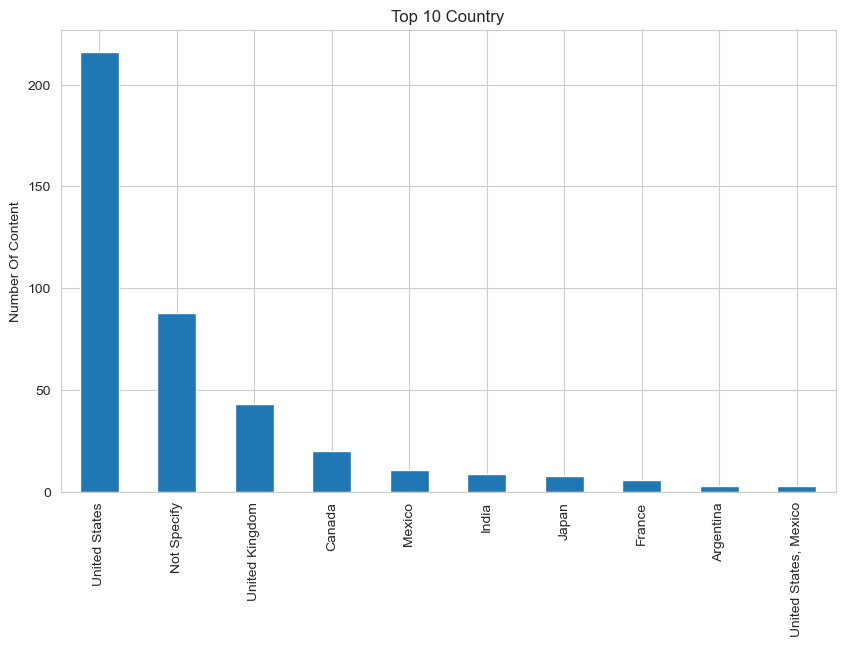

In [55]:
# top 10 countries producing less than 60 minutes of movie content
short_movies["country"].value_counts().head(10).plot(kind="bar",title="Top 10 Country", ylabel="Number Of Content")

In [56]:
# Using a for loop, assign colors of your choice to four genre groups from netflix_movies, 
# ("Children", "Documentaries", "Stand-Up", and "Other") saving them to a colors list, 
# and use this to initialize a figure object and create a scatter plot for movie duration by release 
# year using the labels "Release year" for the x-axis,
# "Duration (min)" for the y-axis, and the title "Movie Duration by Year of Release"

# define an empty list
colors = []

# iterate over rows of short_movies
for x, row in short_movies.iterrows() :
    if row["genre"] == "Children":
        colors.append("red")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("yellow")
        
# inspect the first 5 values in list        
colors[:5]

['blue', 'red', 'red', 'red', 'yellow']

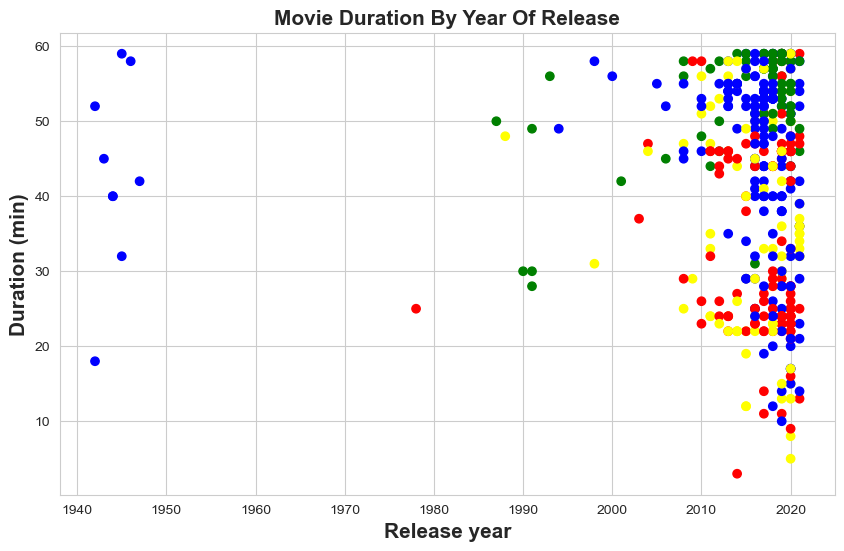

In [57]:
# create a scatter plot of duration versus release_year
plt.scatter(short_movies.release_year, short_movies.duration, color=colors)

# create a title and axis labels
plt.title("Movie Duration By Year Of Release", fontweight ='bold', fontsize = 15)
plt.xlabel("Release year", fontweight ='bold', fontsize = 15)
plt.ylabel("Duration (min)", fontweight ='bold', fontsize = 15)

# save scatter plot as png
plt.savefig(fname = "grafic2.png")

# show the plot
plt.show()

In [ ]:
# observation 10: particularly in recent years, there has been an increase in the number of content and genres less than 60 min.
# there has been visibly decrease, movies minimum duration

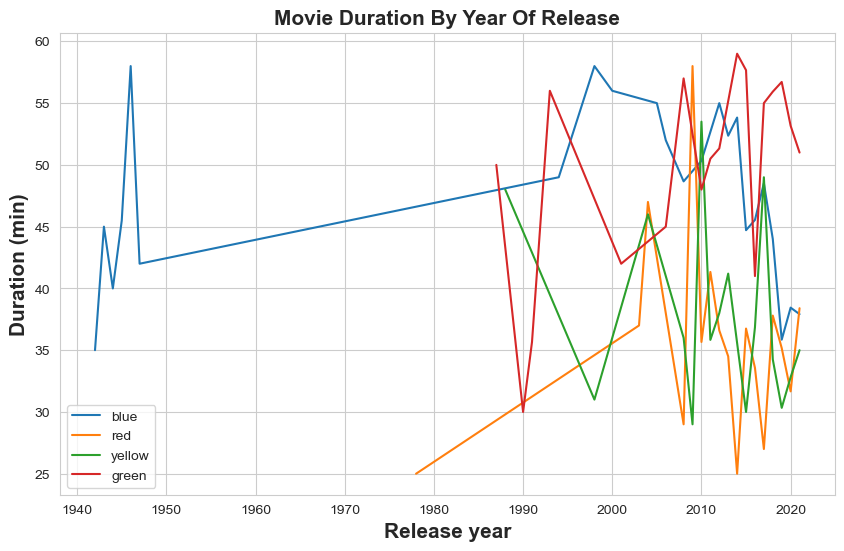

In [58]:
# create a line of duration versus release_year
sns.lineplot(x="release_year",y="duration", data = short_movies, ci = None, hue = colors)
plt.title("Movie Duration By Year Of Release", fontweight ='bold', fontsize = 15)
plt.xlabel("Release year", fontweight ='bold', fontsize = 15)
plt.ylabel("Duration (min)", fontweight ='bold', fontsize = 15)
plt.show()

In [ ]:
# it's too complicated, let's try it with relplot

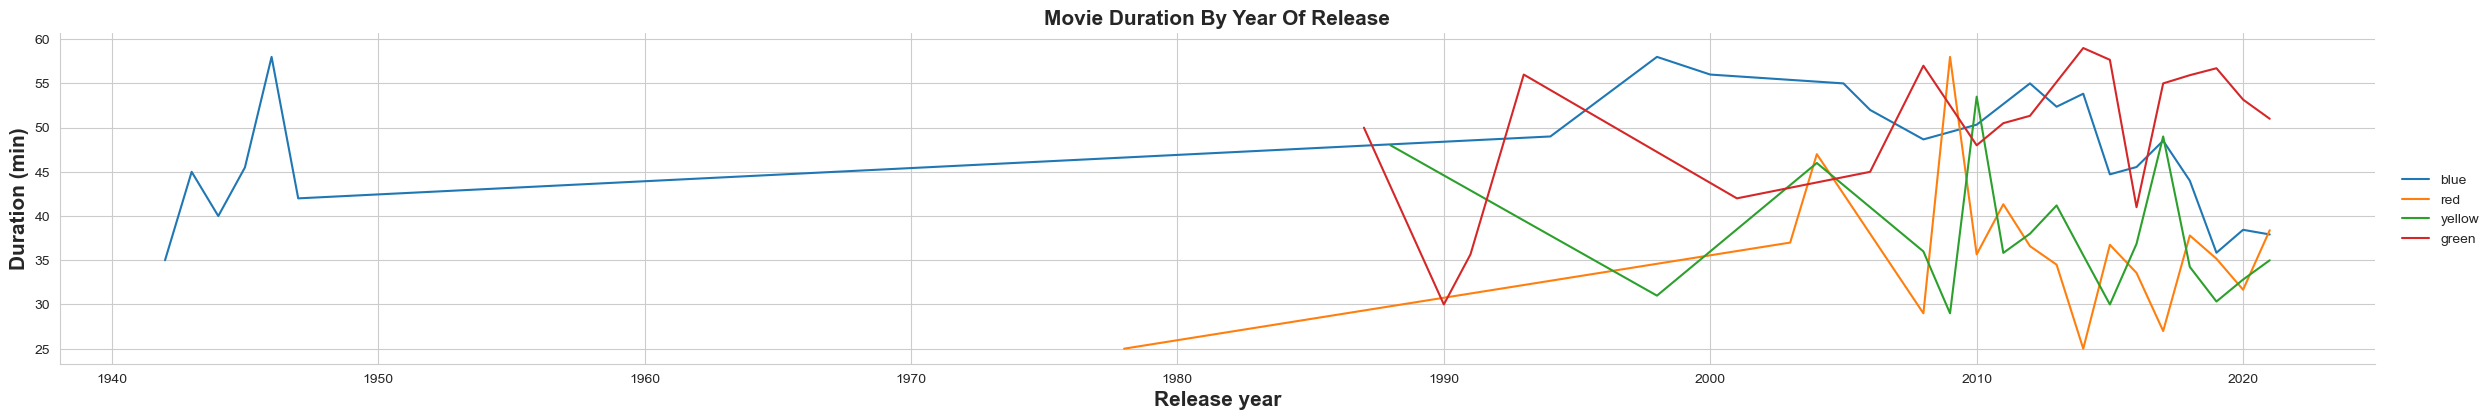

In [59]:
# create a relplot of duration versus release_year
sns.relplot(x="release_year",y="duration", data = short_movies, ci = None, hue = colors, kind = "line", height=4, aspect=6)
plt.title("Movie Duration By Year Of Release", fontweight ='bold', fontsize = 15)
plt.xlabel("Release year", fontweight ='bold', fontsize = 15)
plt.ylabel("Duration (min)", fontweight ='bold', fontsize = 15)
# save relplot as png
plt.savefig(fname="grafic3.png")

# show the plot
plt.show()

In [ ]:
# according to relplot above the line; there has been a decrease in the duration of the children and documentries
# there has been an increase in the duration of the stand up

In [60]:
netflix_movies["country"].value_counts()

United States                            2054
India                                     886
Not Specify                               429
United Kingdom                            208
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 647, dtype: int64

## <span class="burk">Turning Exploratory Analysis into Action</span>

### Considerations for Categorical Data

In [61]:
# Cross-tabulate country and genre
pd.crosstab(short_movies["country"], short_movies["genre"])

genre,Children,Documentaries,Other,Stand-Up
country,,,,
Argentina,0,1,0,2
Australia,2,0,0,0
"Australia, Canada",1,0,0,0
Brazil,0,0,2,1
Canada,14,2,3,1
"Canada, United Kingdom",0,1,0,0
"Canada, United States",0,1,0,0
Colombia,0,0,0,1
"Czech Republic, France",0,1,0,0


In [ ]:
# we can see the number of countries by genre of content
# observation 11: united states has the most genres and the most content

In [62]:
# average duration of genres by year
(pd.crosstab(short_movies["release_year"], short_movies["genre"], values=short_movies["duration"], aggfunc="mean")).fillna("0")

genre,Children,Documentaries,Other,Stand-Up
release_year,,,,
1942,0,35.000,0,0
1943,0,45.000,0,0
1944,0,40.000,0,0
1945,0,45.500,0,0
1946,0,58.000,0,0
1947,0,42.000,0,0
1978,25.000,0,0,0
1987,0,0,0,50.000
1988,0,0,48.000,0


In [63]:
# organize data in field country
for _ in range(0,len(netflix_movies)):
    netflix_movies["country"][_] = netflix_movies["country"].values[0:len(netflix_movies)][_].split(", ")[0:]

In [64]:
# define empty list
countries = []

# insert each element in the country field to countries list 
for i in range (len(netflix_movies)):
    for j in range(len(netflix_movies["country"][i])):
            countries.append(netflix_movies["country"][i][j]) 

In [65]:
# finding the top 10 countries that have the most content
country_number = Counter(countries)
sorted(country_number.items(), key=lambda pair: pair[1], reverse=True)
country_number.most_common(10)

[('United States', 2746),
 ('India', 954),
 ('United Kingdom', 534),
 ('Not Specify', 429),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 116),
 ('China', 114)]

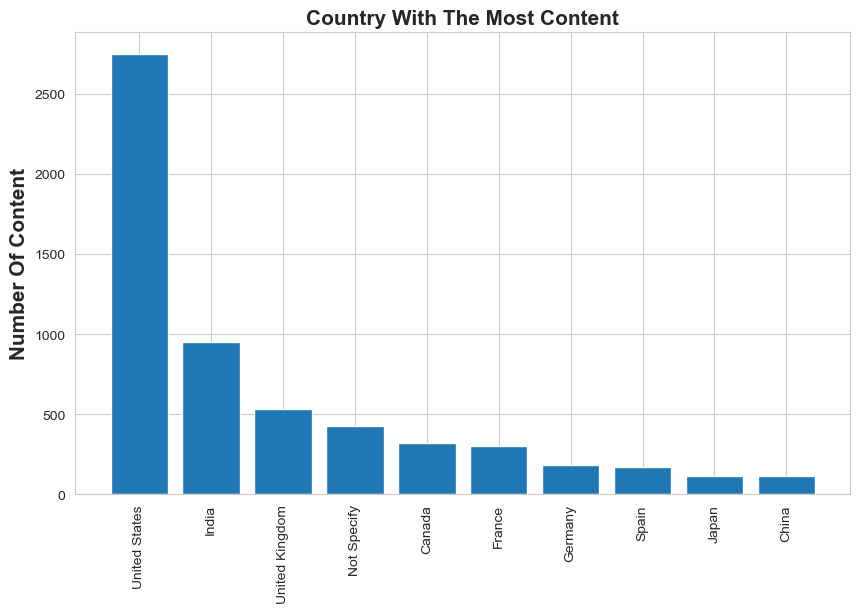

In [66]:
# demonstrate as grafic
x, y = zip(*country_number.most_common(10))

# set them up as bar
plt.bar(x, y)
plt.title("Country With The Most Content", fontweight ='bold', fontsize = 15)
plt.ylabel("Number Of Content", fontweight ='bold', fontsize = 15)
# rotate country names 90 degrees
plt.xticks(rotation=90)

# show the plot
plt.show()

In [67]:
# create a new dataframe to work with movies in usa and turkey
df_TUR = df[(df["country"] == "Turkey") & (df["type"] == "Movie")]
df_USA = df[(df["country"] == "United States") & (df["type"] == "Movie")]

In [68]:
# selecting specific fields for each dataframe
df_TUR = df_TUR[["title", "director","cast","production","rating","duration"]]
df_USA = df_USA[["title", "director","cast","production","rating","duration"]]

In [69]:
# finding most popular director in usa and turkey
most_popular_directors_TUR = df_TUR[df_TUR.director != "No Director"]["director"].value_counts().head(10)
most_popular_directors_USA = df_USA[df_USA.director != "No Director"]["director"].value_counts().head(10)

In [70]:
# finding most popular cast in turkey and usa
most_popular_cast_TUR = df_TUR[df_TUR.cast != "No Cast"]["cast"].value_counts().head(10)
most_popular_cast_USA = df_USA[df_USA.cast != "No Cast"]["cast"].value_counts().head(10)

In [71]:
most_popular_directors_TUR

Yılmaz Erdoğan     8
Hakan Algül        8
Ozan Açıktan       5
Kıvanç Baruönü     5
Burak Aksak        3
Hasan Karacadağ    3
Bedran Güzel       3
Cem Yılmaz         2
Sermiyan Midyat    2
Şenol Sönmez       2
Name: director, dtype: int64

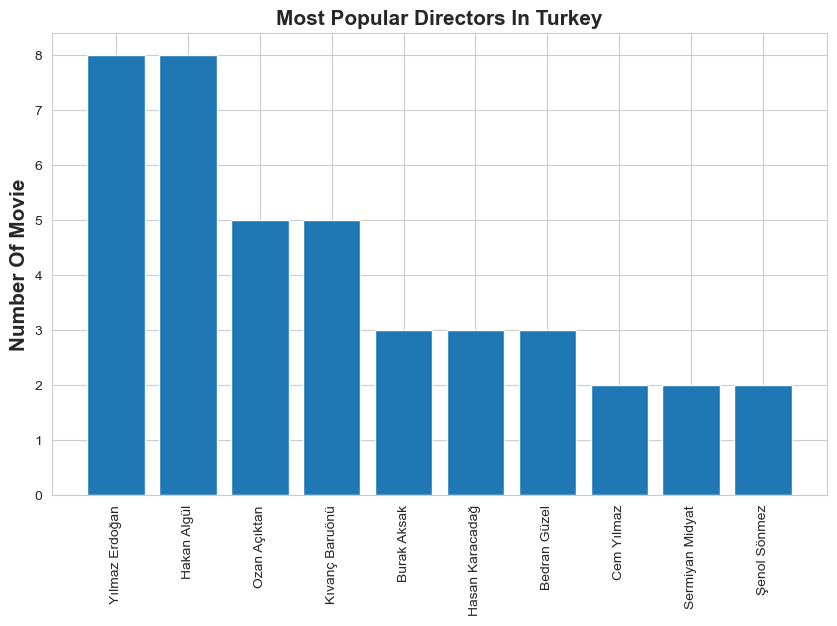

In [72]:
# finding top 10 director for turkey
plt.bar(most_popular_directors_TUR.index, most_popular_directors_TUR.values)
plt.title("Most Popular Directors In Turkey", fontweight ='bold', fontsize = 15)
plt.ylabel("Number Of Movie", fontweight ='bold', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [73]:
# Production names and cast directed by Yılmaz Erdoğan
df_TUR[df_TUR["director"].str.contains("Yılmaz Erdoğan", na=False)][["title", "cast"]]

,title,cast
show_id,,
s907,Have You Ever Seen Fireflies? - Theatre Play,"[Demet Akbağ, Zerrin Sümer, Sinan Bengier, Sal..."
s996,Vizontele,"[Yılmaz Erdoğan, Demet Akbağ, Altan Erkekli, C..."
s2606,Ekşi Elmalar,"[Yılmaz Erdoğan, Farah Zeynep Abdullah, Songül..."
s2621,Neseli Hayat,"[Yılmaz Erdoğan, Ersin Korkut, Büşra Pekin, Er..."
s2622,Organize Isler,"[Yılmaz Erdoğan, Tolga Çevik, Demet Akbağ, Alt..."
s3403,"Love, Surreal and Odd","[Aylin Kontante, Bülent Emrah Parlak, Büşra Pe..."
s3890,Money Trap,"[Yılmaz Erdoğan, Kıvanç Tatlıtuğ, Ezgi Mola, B..."
s5582,The Butterfly's Dream,"[Kıvanç Tatlıtuğ, Mert Fırat, Belçim Bilgin, F..."
s8683,Vizontele Tuuba,"[Yılmaz Erdoğan, Tarık Akan, Altan Erkekli, Ce..."


In [74]:
# Production names and cast directed by Hakan Algül
df_TUR[df_TUR["director"].str.contains("Hakan Algül", na=False)][["title", "cast"]]

,title,cast
show_id,,
s979,Deliha,"[Gupse Özay, Barış Arduç, Cihan Ercan]"
s991,Niyazi Gül Dörtnala,"[Ata Demirer, Demet Akbağ, Şebnem Bozoklu, Lev..."
s2025,Night of Knots,"[Şahin Irmak, İrem Sak, Gonca Vuslateri, Emre ..."
s3428,Bygones Be Bygones,"[Ata Demirer, Tuvana Türkay, Ülkü Duru, Salih ..."
s6286,Berlin Kaplani,"[Ata Demirer, Necati Bilgiç, Tarık Ünlüoğlu, Ö..."
s6726,Eyyvah Eyyvah,"[Demet Akbağ, Ata Demirer, Özge Borak, Bican G..."
s6727,Eyyvah Eyyvah 2,"[Demet Akbağ, Ata Demirer, Özge Borak, Salih K..."
s6728,Eyyvah Eyyvah 3,"[Demet Akbağ, Ata Demirer, Özge Borak, Salih K..."


In [ ]:
# The most popular directors to work with in Turkey are "Hakan Algül" and "Yılmaz Erdoğan". 
# "Hakan Algul" 8 movie; "Yılmaz Erdoğan" directed 7 movies and a theater play, most of which he was involved in as an actor.

In [75]:
# make a loop where Turkish actors are counted
actor = []
for i in range (len(df_TUR)):
    for j in range(len(df_TUR["cast"][i])):
            actor.append(df_TUR["cast"][i][j]) 

In [77]:
# sort counted Turkish actors
cast_number_TUR = Counter(actor)
sorted(cast_number_TUR.items(), key=lambda pair: pair[1], reverse=True)

[('Demet Akbağ', 13),
 ('Cezmi Baskın', 9),
 ('Salih Kalyon', 7),
 ('Ata Demirer', 7),
 ('Yılmaz Erdoğan', 7),
 ('Büşra Pekin', 7),
 ('Devrim Yakut', 6),
 ('Erdal Tosun', 6),
 ('Cem Yılmaz', 6),
 ('Cengiz Bozkurt', 6),
 ('Tarık Ünlüoğlu', 6),
 ('Fatih Artman', 5),
 ('Gupse Özay', 5),
 ('Eda Ece', 5),
 ('Tolga Çevik', 5),
 ('Ersin Korkut', 5),
 ('Bican Günalan', 4),
 ('Binnur Kaya', 4),
 ('Özge Borak', 4),
 ('Ezgi Mola', 4),
 ('İbrahim Büyükak', 4),
 ('Altan Erkekli', 4),
 ('Gülhan Tekin', 4),
 ('Belçim Bilgin', 4),
 ('Zerrin Sümer', 3),
 ('Engin Günaydın', 3),
 ('Erdem Yener', 3),
 ('İrem Sak', 3),
 ('Cihan Ercan', 3),
 ('Rasim Öztekin', 3),
 ('Şinasi Yurtsever', 3),
 ('Berat Yenilmez', 3),
 ('Bahar Şahin', 3),
 ('Gürgen Öz', 3),
 ('İlker Aksum', 3),
 ('Bahtiyar Engin', 3),
 ('Mahir İpek', 3),
 ('Erkan Can', 3),
 ('Ahmet Mümtaz Taylan', 3),
 ('Burcu Gönder', 3),
 ('Tanju Tuncel', 3),
 ('Sinan Bengier', 2),
 ('Onur Buldu', 2),
 ('Barış Arduç', 2),
 ('Ahmet Kural', 2),
 ('Murat Cemcir', 

In [78]:
# most popular 10 Turkish actors who acted in the most production
cast_number_TUR.most_common(10)

[('Demet Akbağ', 13),
 ('Cezmi Baskın', 9),
 ('Salih Kalyon', 7),
 ('Ata Demirer', 7),
 ('Yılmaz Erdoğan', 7),
 ('Büşra Pekin', 7),
 ('Devrim Yakut', 6),
 ('Erdal Tosun', 6),
 ('Cem Yılmaz', 6),
 ('Cengiz Bozkurt', 6)]

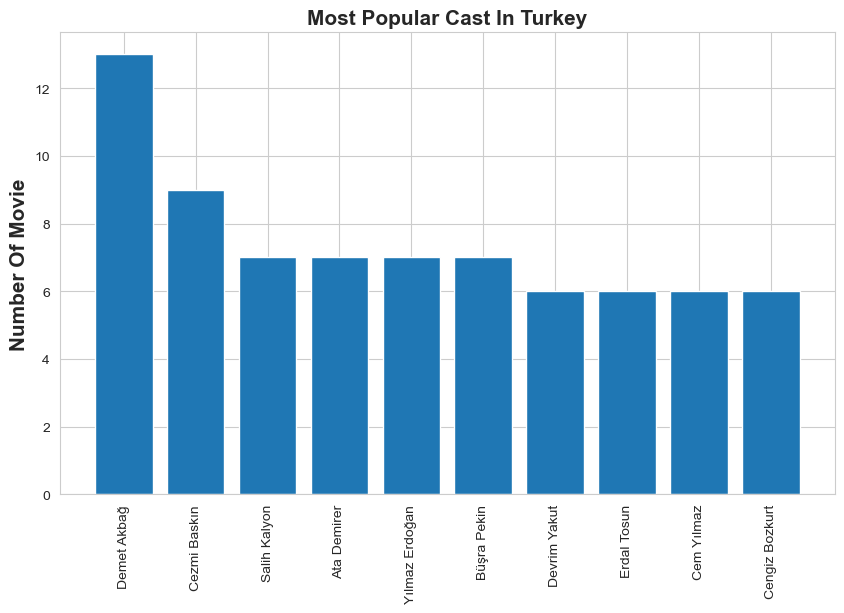

In [79]:
# Plot the most popular 10 Turkish actors who acted in the most production as a bar chart 
x, y = zip(*cast_number_TUR.most_common(10))
plt.bar(x, y)
plt.title("Most Popular Cast In Turkey", fontweight ='bold', fontsize = 15)
plt.ylabel("Number Of Movie", fontweight ='bold', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# "Demet Akbağ", who acted 13 films in total, worked with 2 different directors who directed the most productions in Turkey 
# in 7 films (one theater play), proved to be the most popular actress by far. 
# Then, respectively, "Cezmi Baskin" and "Salih Kalyon" come.

In [ ]:
# Actors who work closely and are compatible with each other in Turkey are usually actors who have acted together 
# in more than one movie. For example, the most cooperative players in Turkey are "Demet Akbağ" and "Ata Demirer". 
# They have acted in 4 movies together. Ozge Borak and Salih Kalyon, with whom they played together in the same film series 
# (Eyyvah Eyyvah), can be included. As can be seen, although the same actors come together due to the nature of the serial films,
# it is noteworthy that most of these films are in the "comedy" genre.

In [ ]:
# The closest working actor/director pairs in Turkey are typically those with a strong working relationship. 
# For example, the most collaborating actor/director trio in Turkey is "Demet Akbağ", "Ata Demirer" and "Hakan Algül". 
# "They worked together in 4 projects in total.

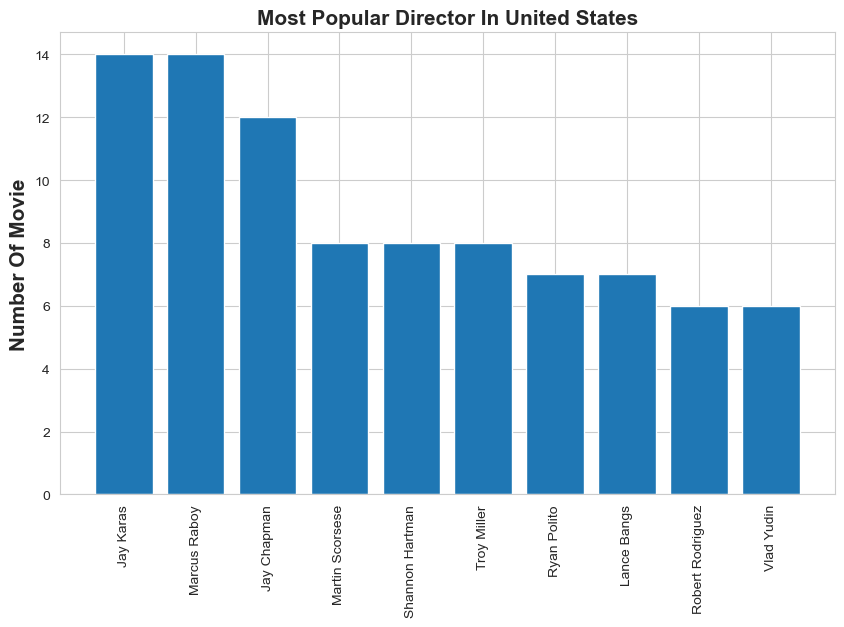

In [80]:
# finding top 10 director for united states
plt.bar(most_popular_directors_USA.index, most_popular_directors_USA.values)
plt.title("Most Popular Director In United States", fontweight ='bold', fontsize = 15)
plt.ylabel("Number Of Movie", fontweight ='bold', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# The most popular directors to work with in the USA are "Martin Scorsese", "Steven Spielberg" and "Robert Rodriguez". 
# "Martin Scorsese" directed 8 movies, "Steven Spielberg" and Robert Rodriguez" directed 6 movies

In [81]:
# Production names and cast directed by Jay Karas
df_USA[df_USA["director"].str.contains("Jay Karas", na=False)][["title", "cast"]] #stand up

,title,cast
show_id,,
s2696,The Main Event,"[Seth Carr, Tichina Arnold, Adam Pally, Ken Ma..."
s3647,Demetri Martin: The Overthinker,[Demetri Martin]
s3734,Adam Devine: Best Time of Our Lives,[Adam Devine]
s4804,Bill Burr: You People Are All the Same,[Bill Burr]
s4864,Ali Wong: Hard Knock Wife,[Ali Wong]
s5087,Tom Segura: Disgraceful,[Tom Segura]
s5231,Christina P: Mother Inferior,[Christina Pazsitzky]
s5623,Bill Burr: Walk Your Way Out,[Bill Burr]
s5809,Jeff Foxworthy and Larry the Cable Guy: We’ve ...,"[Jeff Foxworthy, Larry the Cable Guy]"


In [82]:
# Production names and cast directed by Marcus Raboy
df_USA[df_USA["director"].str.contains("Marcus Raboy", na=False)][["title", "cast"]] #stand up

,title,cast
show_id,,
s2850,Taylor Tomlinson: Quarter-Life Crisis,[Taylor Tomlinson]
s3777,Miranda Sings Live…Your Welcome,[Colleen Ballinger]
s3878,Anthony Jeselnik: Fire in the Maternity Ward,[Anthony Jeselnik]
s4315,Vir Das: Losing It,[Vir Das]
s4789,Katt Williams: Kattpacalypse,[Katt Williams]
s4852,Steve Martin and Martin Short: An Evening You ...,"[Steve Martin, Martin Short]"
s5025,Marlon Wayans: Woke-ish,[Marlon Wayans]
s5128,Judd Apatow: The Return,[Judd Apatow]
s5172,DeRay Davis: How to Act Black,[DeRay Davis]


In [83]:
# Production names and cast directed by Jay Chapman
df_USA[df_USA["director"].str.contains("Jay Chapman", na=False)][["title", "cast"]] #stand up

,title,cast
show_id,,
s3646,D.L. Hughley: Contrarian,[D.L. Hughley]
s4223,Moshe Kasher: Live in Oakland,[Moshe Kasher]
s4249,Todd Glass: Stand-Up Special,[Todd Glass]
s5109,Todd Barry: Spicy Honey,[Todd Barry]
s5135,Craig Ferguson: Tickle Fight,[Craig Ferguson]
s5326,Brad Paisley's Comedy Rodeo,"[Brad Paisley, Nate Bargatze, John Heffron, Jo..."
s5327,Colin Quinn: Unconstitutional,[Colin Quinn]
s5379,D.L. Hughley: Clear,[D.L. Hughley]
s5380,Tom Segura: Completely Normal,[Tom Segura]


In [84]:
# Production names and cast directed by Shannon Hartman
df_USA[df_USA["director"].str.contains("Shannon Hartman", na=False)][["title", "cast"]] # stand-up

,title,cast
show_id,,
s2979,Kevin Hart: I'm a Grown Little Man,[Kevin Hart]
s3621,Jim Jefferies : BARE,[Jim Jefferies]
s3759,Jo Koy: Comin' In Hot,[Jo Koy]
s4815,W. Kamau Bell: Private School Negro,[W. Kamau Bell]
s5558,Jo Koy: Live from Seattle,[Jo Koy]
s5577,Jim Norton: Mouthful of Shame,[Jim Norton]
s5713,Donald Glover: Weirdo,[Donald Glover]
s6311,Bill Burr: Let It Go,[Bill Burr]
s7181,Kevin Hart: Seriously Funny,[Kevin Hart]


In [85]:
# Production names and cast directed by Troy Miller
df_USA[df_USA["director"].str.contains("Troy Miller", na=False)][["title", "cast"]] #stand up

,title,cast
show_id,,
s1190,Nate Bargatze: The Greatest Average American,[Nate Bargatze]
s1279,Brian Regan: On the Rocks,[Brian Regan]
s2322,George Lopez: We'll Do It For Half,[George Lopez]
s3496,Jeff Dunham: Beside Himself,[Jeff Dunham]
s5162,Brian Regan: Nunchucks and Flamethrowers,[Brian Regan]
s5794,Cedric the Entertainer: Live from the Ville,[Cedric the Entertainer]
s5817,Jim Gaffigan: King Baby,[Jim Gaffigan]
s6656,Dumb and Dumberer: When Harry Met Lloyd,"[Eric Christian Olsen, Derek Richardson, Rache..."


In [86]:
# Production names and cast directed by Martin Scorsese
df_USA[df_USA["director"].str.contains("Martin Scorsese", na=False)][["title", "cast"]] 

,title,cast
show_id,,
s1359,Shutter Island,"[Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley..."
s3228,The Irishman,"[Robert De Niro, Al Pacino, Joe Pesci, Harvey ..."
s3760,Rolling Thunder Revue: A Bob Dylan Story by Ma...,"[Bob Dylan, Allen Ginsberg, Joan Baez, Patti S..."
s6112,Alice Doesn't Live Here Anymore,"[Ellen Burstyn, Kris Kristofferson, Billy Gree..."
s6881,GoodFellas,"[Robert De Niro, Ray Liotta, Joe Pesci, Lorrai..."
s7432,Mean Streets,"[Robert De Niro, Harvey Keitel, David Proval, ..."
s7821,Raging Bull,"[Robert De Niro, Cathy Moriarty, Joe Pesci, Fr..."
s8736,Who's That Knocking at My Door?,"[Zina Bethune, Harvey Keitel, Anne Collette, L..."


In [87]:
# Production names and cast directed by Ryan Polito
df_USA[df_USA["director"].str.contains("Ryan Polito", na=False)][["title", "cast"]] #stand up

,title,cast
show_id,,
s3442,Deon Cole: Cole Hearted,[Deon Cole]
s3975,Nate Bargatze: The Tennessee Kid,[Nate Bargatze]
s4084,Bert Kreischer: The Machine,[Bert Kreischer]
s4939,Seth Rogen's Hilarity for Charity,"[Seth Rogen, Ike Barinholtz, Michael Che, Sach..."
s4951,John Mulaney: New in Town,[John Mulaney]
s5481,Tracy Morgan: Staying Alive,[Tracy Morgan]
s5836,Jim Jefferies: Freedumb,[Jim Jefferies]


In [88]:
# Production names and cast directed by Lance Bangs
df_USA[df_USA["director"].str.contains("Lance Bangs", na=False)][["title", "cast"]] # stand up

,title,cast
show_id,,
s3161,Michelle Wolf: Joke Show,[Michelle Wolf]
s3620,I'm Brent Morin,[Brent Morin]
s4451,Marc Maron: Thinky Pain,[Marc Maron]
s5647,Jen Kirkman: Just Keep Livin’?,[Jen Kirkman]
s5869,Hannibal Buress: Comedy Camisado,[Hannibal Buress]
s5912,Jen Kirkman: I'm Gonna Die Alone (And I Feel F...,[Jen Kirkman]
s5925,Chelsea Peretti: One of the Greats,[Chelsea Peretti]


In [89]:
# Production names and cast directed by Leslie Small
df_USA[df_USA["director"].str.contains("Leslie Small", na=False)][["title", "cast"]] # stand up

,title,cast
show_id,,
s1687,Kevin Hart: Zero F**ks Given,[Kevin Hart]
s3219,Holiday Rush,"[Romany Malco, Sonequa Martin-Green, Darlene L..."
s3310,Undercover Brother 2,"[Michael Jai White, Vince Swann, Barry Bostwic..."
s3953,Kevin Hart: Irresponsible,[Kevin Hart]
s5536,Kevin Hart: What Now?,"[Kevin Hart, Don Cheadle, Halle Berry, Ed Helm..."
s7179,Kevin Hart: Laugh at My Pain,[Kevin Hart]
s7180,Kevin Hart: Let Me Explain,[Kevin Hart]


In [90]:
# Production names and cast directed by Robert Rodriguez 
df_USA[df_USA["director"].str.contains("Robert Rodriguez", na=False)][["title", "cast"]] 

,title,cast
show_id,,
s864,Spy Kids: All the Time in the World,"[Jessica Alba, Joel McHale, Rowan Blanchard, M..."
s1495,We Can Be Heroes,"[YaYa Gosselin, Pedro Pascal, Priyanka Chopra,..."
s8075,Spy Kids,"[Antonio Banderas, Carla Gugino, Alan Cumming,..."
s8076,Spy Kids 2: The Island of Lost Dreams,"[Antonio Banderas, Carla Gugino, Alexa PenaVeg..."
s8077,Spy Kids 3: Game Over,"[Daryl Sabara, Sylvester Stallone, Ricardo Mon..."
s8184,The Adventures of Sharkboy and Lavagirl,"[Taylor Lautner, Taylor Dooley, Cayden Boyd, G..."


In [91]:
# Production names and cast directed by Steven Spielberg 
df_USA[df_USA["director"].str.contains("Steven Spielberg", na=False)][["title", "cast"]]

,title,cast
show_id,,
s42,Jaws,"[Roy Scheider, Robert Shaw, Richard Dreyfuss, ..."
s7071,Indiana Jones and the Kingdom of the Crystal S...,"[Harrison Ford, Cate Blanchett, Karen Allen, R..."
s7072,Indiana Jones and the Last Crusade,"[Harrison Ford, Sean Connery, Denholm Elliott,..."
s7073,Indiana Jones and the Raiders of the Lost Ark,"[Harrison Ford, Karen Allen, Paul Freeman, Ron..."
s7074,Indiana Jones and the Temple of Doom,"[Harrison Ford, Kate Capshaw, Amrish Puri, Ros..."
s7958,Schindler's List,"[Liam Neeson, Ben Kingsley, Ralph Fiennes, Car..."


In [92]:
# Production names and cast directed by Sylvester Stallone
df_USA[df_USA["director"].str.contains("Sylvester Stallone", na=False)][["title", "cast"]] # film serisi 

,title,cast
show_id,,
s7881,Rocky II,"[Sylvester Stallone, Talia Shire, Burt Young, ..."
s7882,Rocky III,"[Sylvester Stallone, Talia Shire, Burt Young, ..."
s7883,Rocky IV,"[Sylvester Stallone, Talia Shire, Burt Young, ..."


In [93]:
df_USA[df_USA["title"].str.contains("Matrix", na=False)][["director", "cast"]] # film serisi 

,director,cast
show_id,,
s8415,"Lilly Wachowski, Lana Wachowski","[Keanu Reeves, Laurence Fishburne, Carrie-Anne..."
s8416,"Lilly Wachowski, Lana Wachowski","[Keanu Reeves, Laurence Fishburne, Carrie-Anne..."
s8417,"Lilly Wachowski, Lana Wachowski","[Keanu Reeves, Laurence Fishburne, Carrie-Anne..."


In [94]:
df_USA = df_USA[df_USA["cast"] != "No Cast"]

In [95]:
df_USA["cast"]

show_id
s10      [Melissa McCarthy, Chris O'Dowd, Kevin Kline, ...
s28      [Adam Sandler, Kevin James, Chris Rock, David ...
s29      [Keri Russell, Josh Hamilton, J.K. Simmons, Da...
s42      [Roy Scheider, Robert Shaw, Richard Dreyfuss, ...
s43      [Roy Scheider, Lorraine Gary, Murray Hamilton,...
                               ...                        
s8792    [Charlize Theron, Patton Oswalt, Patrick Wilso...
s8794    [Dennis Quaid, Rene Russo, Sean Faris, Katija ...
s8803    [Mark Ruffalo, Jake Gyllenhaal, Robert Downey ...
s8805    [Jesse Eisenberg, Woody Harrelson, Emma Stone,...
s8806    [Tim Allen, Courteney Cox, Chevy Chase, Kate M...
Name: cast, Length: 1859, dtype: object

In [96]:
# make a loop where American actors are counted
actor2 = []
for i in range (len(df_USA)):
    for j in range(len(df_USA["cast"][i])):
            actor2.append(df_USA["cast"][i][j]) 

In [97]:
# sort counted American actors
cast_number_USA = Counter(actor2)
sorted(cast_number_USA.items(), key=lambda pair: pair[1], reverse=True)

[('Adam Sandler', 20),
 ('Samuel L. Jackson', 17),
 ('Laura Bailey', 14),
 ('Molly Shannon', 13),
 ('James Franco', 13),
 ('Nicolas Cage', 13),
 ('Chris Rock', 12),
 ('Dennis Quaid', 12),
 ('Seth Rogen', 12),
 ('Fred Tatasciore', 12),
 ('Erin Fitzgerald', 12),
 ('Kate Higgins', 12),
 ('Woody Harrelson', 11),
 ('Martin Lawrence', 11),
 ('Mike Epps', 11),
 ('Michael Peña', 11),
 ('Kristen Stewart', 11),
 ('Amy Adams', 11),
 ('Ray Liotta', 11),
 ('Kevin Hart', 11),
 ('Morgan Freeman', 11),
 ('Danny Trejo', 11),
 ('Kevin James', 10),
 ('David Koechner', 10),
 ('Bruce Willis', 10),
 ('John C. Reilly', 10),
 ('Danny McBride', 10),
 ('Will Ferrell', 10),
 ('Will Smith', 10),
 ('John Travolta', 10),
 ('Steve Buscemi', 10),
 ('Zach Galifianakis', 10),
 ('Liev Schreiber', 10),
 ('Nick Swardson', 10),
 ('Loretta Devine', 9),
 ('David Spade', 9),
 ('Rob Schneider', 9),
 ('Maria Bello', 9),
 ('Maya Rudolph', 9),
 ('Ryan Reynolds', 9),
 ('Laurence Fishburne', 9),
 ('Cedric the Entertainer', 9),
 ('T

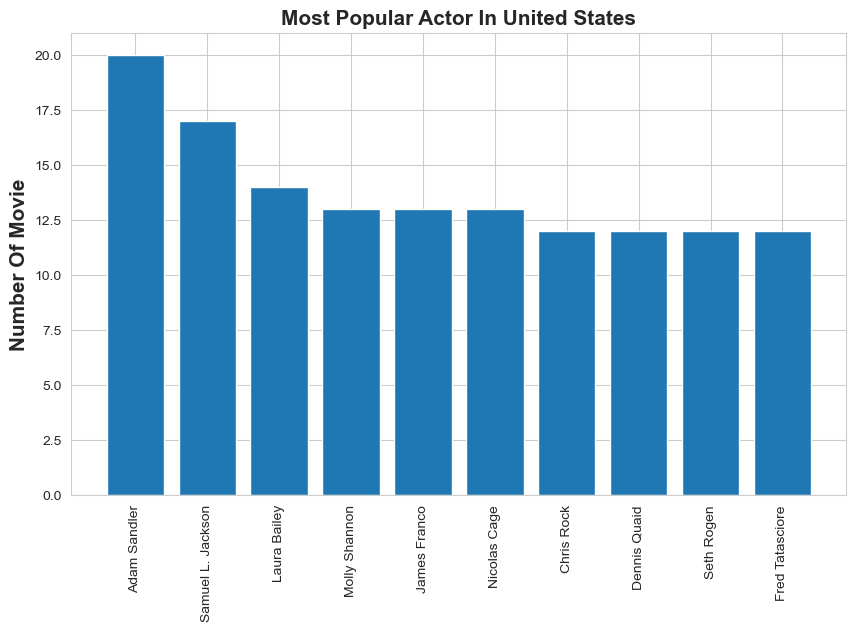

In [98]:
# Plot the most popular 10 American actors who acted in the most production as a bar chart
x, y = zip(*cast_number_USA.most_common(10))
plt.bar(x, y)
plt.title("Most Popular Actor In United States", fontweight ='bold', fontsize = 15)
plt.ylabel("Number Of Movie", fontweight ='bold', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# "Adam Sandler" has shown herself to be by far the most popular actor, starring in 20 separate productions. 
# Then, respectively, "Samuel L. Jackson" and "Laura Bailey" come.

In [ ]:
# In the USA, the closest working actor/director pairs are typically those with a strong working relationship. 
# For example, we can mention the compatibility of "Robert De Niro" who also appeared in 4 different Martin Scorsese movies; 
# "Harrison Ford" who also appeared in 4 "Indiana Jones" series movies directed by "Steven Spielberg"; "Alexa Vega" and 
# "Darly Sabara", who also appeared in 4 "Spy Kids" series movies directed by "Robert Rodriguez". Also "Talia Shire", 
# "Burt Young" and "Carl Weathers", who acted together with "Sylvester Stallone" are compatible actors with the director.
# As in the example of Yılmaz Erdoğan in Turkey, "Sylvester Stallone" acted in 3 different "Rocky" films he directed. 
# We can say  there is a strong relationship between Robert De Niro and Martin Scorsese. Because they worked together 
# at least 4 movies and these movies are not a serial type. 

In [ ]:
# In the USA, the closest working and compatible actors are usually those who have acted together in more than one movie. 
# For example, the most collaborative actors in the USA are "Alexa Vega" and "Darly Sabara", who acted together in 4 movies 
# in the "Spy Kids" series. "Antonio Banderas" accompanied them in 3 films of the same film series. "Sylvester Stallone", 
# "Talia Shire", "Burt Young", "Carl Weathers", who acted together in 3 films in the "Rocky" film series; "Keanu Reeves", 
# "Laurence Fishburne", "Carrie-Anne Moss", "Hugo Weaving", who acted together in 3 films in the "Matrix" series and 
# "Will Yun Lee", "Jermaine Love","Rory Markham", "Bertrand-Xavier Corbi" who acted together in 3 films in the "Rogue Warfare" 
# series may be included in . As you can see, due to the nature of serial films, the same actors come together. 
# In the USA, it is possible to say that the genre of serial films in which the actors often act together is in the 
# action/adventure genre, unlike Turkey.

### Generating New Features

In [ ]:
# we decided to deeper our review of movies shorter than 60 minutes
# as you know, Netflix was a DVD rental company. After 2007, it started to broadcast content over the internet
# let's re-examine the records after 2007

In [99]:
# content added after 2007
df_after = df[df["added_year"] > 2007]

In [100]:
#selecting releated fields
df_after = df_after[["type","title","country","genre","release_year","added_year","production","rating_age","duration"]]

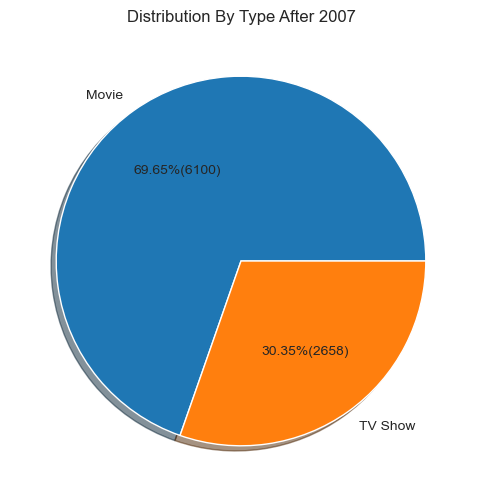

In [101]:
Type2 = df_after.groupby("type").size()
Type2.plot(kind = "pie", title = "Distribution By Type After 2007", ylabel="", figsize=[10,6], shadow = True,
          autopct=lambda p:"{:.2f}%({:.0f})".format(p,(p/100)*Type2.sum()))

# save pie plot as png
plt.savefig(fname="graphic1.png", transparent = True)

# show pie plot
plt.show()

In [102]:
# duration averages, median, minimum and maximum values of content added after 2007 by type
df_after.groupby("type")["duration"].agg(["mean","min","max","median","count"])

,mean,min,max,median,count
type,,,,,
Movie,99.455,3,312,98.000,6100
TV Show,1.753,1,17,1.000,2658


In [103]:
# the average duration of movies was 99 minutes for 6100 movies

In [104]:
# average duration of content added after 2007 by type and genre
df_after.groupby(["type","genre"])["duration"].agg(["mean","min","max","count"])

mean  min  max  count
type    genre                                 
Movie   Children       79.749    3  152    622
        Documentaries  81.636   10  273    867
        Other         108.529    5  312   4268
        Stand-Up       67.327   28  146    343
TV Show Other           1.751    1   17   2602
        Stand-Up        1.839    1   13     56

In [105]:
# the average duration of movies is 79 minutes for the children genre, 81 minutes for documentaries genre,
# 67 minutes for stand up genre and 108 minutes for other genre

In [106]:
# average duration of content added after 2007 by type, genre and rating age
df_after.groupby(["type","genre","rating_age"])["duration"].agg(["mean","min","max","count"])

mean  min  max  count
type    genre         rating_age                         
Movie   Children      Adults     116.000  116  116      1
                      Kids        63.323    3  146    189
                      Older Kids  85.533   14  139    405
                      Teen       106.630   81  152     27
        Documentaries Adults      88.585   22  208    347
                      Kids        68.731   10  273     52
                      Not Rated   86.909   61  110     22
                      Older Kids  71.000   12  156    187
                      Teen        82.147   14  141    259
        Other         Adults     104.782   12  312   2213
                      Kids        78.491   15  181     53
                      Not Rated  101.220   79  143     50
                      Older Kids 109.197   13  233    370
                      Teen       114.851    5  253   1582
        Stand-Up      Adults      67.349   28  146    298
                      Kids        54.667   46   60      3
                      Not Rated   68.200   44   85      5
                      Older Kids  60.429   42   71      7
                      Teen        69.833   57  101     30
TV Show Other         Adults       1.678    1   12   1105
                      Kids         1.864    1   10    265
                      Not Rated    1.667    1    3      3
                      Older Kids   1.783    1   11    511
                      Teen         1.799    1   17    718
        Stand-Up      Adults       1.789    1   13     38
                      Kids         1.000    1    1      2
                      Not Rated    1.000    1    1      1
                      Older Kids   1.200    1    2      5
                      Teen         2.600    1    6     10

In [107]:
# cross-tabulate added_year and genre
pd.crosstab(df_after["added_year"], df_after["genre"],
            values = df_after["duration"], aggfunc = ["mean","min","max","count"]).T

added_year            2008    2009   2010    2011   2012    2013    2014  \
      genre                                                                
mean  Children         NaN     NaN    NaN  75.000 26.000 130.000  81.250   
      Documentaries    NaN     NaN    NaN     NaN 76.000 100.000  87.125   
      Other         81.000  66.500 84.000  95.000 84.000   4.000  21.250   
      Stand-Up       1.000     NaN    NaN     NaN    NaN  54.400  73.750   
min   Children         NaN     NaN    NaN  75.000 26.000 130.000  71.000   
      Documentaries    NaN     NaN    NaN     NaN 76.000 100.000  35.000   
      Other         81.000  29.000 84.000  93.000 84.000   1.000   3.000   
      Stand-Up       1.000     NaN    NaN     NaN    NaN   1.000  68.000   
max   Children         NaN     NaN    NaN  75.000 26.000 130.000 103.000   
      Documentaries    NaN     NaN    NaN     NaN 76.000 100.000 105.000   
      Other         81.000 104.000 84.000 103.000 84.000   6.000  72.000   
      Stand-Up       1.000     NaN    NaN     NaN    NaN  80.000  81.000   
count Children         NaN     NaN    NaN   1.000  1.000   1.000   4.000   
      Documentaries    NaN     NaN    NaN     NaN  1.000   1.000   8.000   
      Other          1.000   2.000  1.000  12.000  1.000   4.000   8.000   
      Stand-Up       1.000     NaN    NaN     NaN    NaN   5.000   4.000   

added_year             2015    2016    2017     2018     2019     2020  \
      genre                                                              
mean  Children       75.000  57.600  77.431   80.226   80.336   79.293   
      Documentaries  82.000  82.706  81.466   81.946   78.332   84.263   
      Other          43.587  39.460  64.535   77.572   69.868   68.249   
      Stand-Up       71.923  67.800  58.521   55.551   57.507   55.500   
min   Children       47.000  23.000  14.000   11.000    3.000    9.000   
      Documentaries  29.000  25.000  18.000   12.000   10.000   15.000   
      Other           1.000   1.000   1.000    1.000    1.000    1.000   
      Stand-Up       58.000   5.000   1.000    1.000    1.000    1.000   
max   Children       93.000  96.000 117.000  152.000  135.000  146.000   
      Documentaries 103.000 117.000 156.000  136.000  142.000  208.000   
      Other         155.000 180.000 179.000  312.000  228.000  253.000   
      Stand-Up       92.000  94.000 102.000  146.000  104.000   85.000   
count Children       11.000  20.000  72.000   84.000  143.000  164.000   
      Documentaries  12.000  68.000 206.000  167.000  187.000  118.000   
      Other          46.000 298.000 830.000 1286.000 1597.000 1537.000   
      Stand-Up       13.000  40.000  73.000  107.000   75.000   56.000   

added_year              2021  
      genre                   
mean  Children        84.835  
      Documentaries   83.222  
      Other           66.148  
      Stand-Up        53.760  
min   Children        13.000  
      Documentaries   14.000  
      Other            1.000  
      Stand-Up         1.000  
max   Children       139.000  
      Documentaries  273.000  
      Other          229.000  
      Stand-Up       111.000  
count Children       121.000  
      Documentaries   99.000  
      Other         1247.000  
      Stand-Up        25.000

In [108]:
# duration statistics of content added after 2007 according to the year they were added
df_after.groupby(["type","added_year"])["duration"].agg(["mean","min","max","count"])

mean  min  max  count
type    added_year                         
Movie   2008        81.000   81   81      1
        2009        66.500   29  104      2
        2010        84.000   84   84      1
        2011        93.462   75  103     13
        2012        62.000   26   84      3
        2013        83.500   44  130      6
        2014        77.000   26  105     19
        2015        83.571   29  155     56
        2016        83.614   22  180    251
        2017        95.681   14  179    832
        2018       101.651   11  312   1234
        2019        99.722    3  228   1415
        2020       101.445    5  253   1280
        2021       102.682   12  273    987
TV Show 2008         1.000    1    1      1
        2013         3.400    1    6      5
        2014         4.800    3    8      5
        2015         2.654    1   10     26
        2016         1.486    1    9    175
        2017         1.679    1   12    349
        2018         1.680    1   15    410
        2019         1.571    1   13    587
        2020         1.854    1   15    595
        2021         1.956    1   17    505

In [ ]:
# observation 12: although Netflix started broadcasting over the internet after 2007, we see an accumulation after 2016.
# let's look at the after 2016.

In [109]:
# movies added since 2016
netflix_movies_2016 = df_after[df_after["added_year"] >= 2016]

In [110]:
# duration average of production after 2007
df_after.groupby(["production"])["duration"].agg(["mean","min","max","count"])

,mean,min,max,count
production,,,,
N,52.196,1,312,3221
O,80.046,1,253,5537


In [111]:
# duration average of production after 2016
netflix_movies_2016.groupby(["production"])["duration"].agg(["mean","min","max","count"])

,mean,min,max,count
production,,,,
N,51.827,1,312,3144
O,80.339,1,253,5476


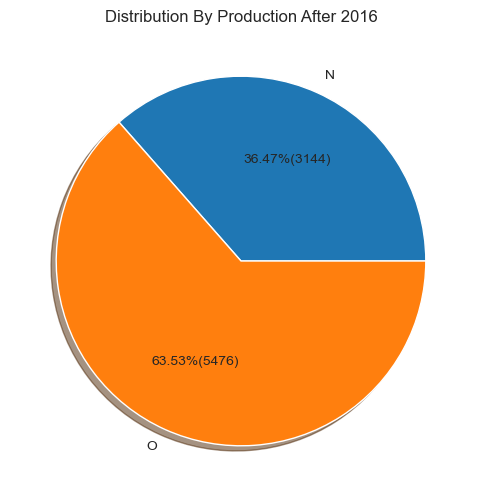

In [112]:
# demonstrate distribution by production after 2016
Type3 = netflix_movies_2016.groupby("production").size()
Type3.plot(kind = "pie", title = "Distribution By Production After 2016", ylabel="", figsize=[10,6], shadow = True,
          autopct=lambda p:"{:.2f}%({:.0f})".format(p,(p/100)*Type3.sum()))

# save pie plot as png
plt.savefig(fname="graphic1.png", transparent = True)

# show pie plot
plt.show()

In [ ]:
# observation 13: 8620 movies added since 2016
# 3144 of these movies were made by Netflix
# the longest movie made by Netflix is 312 minutes
# the longest movie made by other production is 253 minutes
# 63.53 percent of the movies added belong to other producers
# 36.47 percent of the movies added belong to Netflix

In [113]:
# finding duration statictic by production and added_year since 2016
netflix_movies_2016.groupby(["production","added_year"])["duration"].agg(["mean","min","max","count"])

mean  min  max  count
production added_year                        
N          2016       56.550    1  132    189
           2017       63.844    1  166    379
           2018       57.102    1  312    559
           2019       51.439    1  209    659
           2020       46.147    1  190    775
           2021       45.417    1  273    583
O          2016       44.553    1  180    237
           2017       69.820    1  179    802
           2018       86.826    1  214   1085
           2019       80.514    1  228   1343
           2020       86.535    1  253   1100
           2021       83.451    1  229    909

In [ ]:
# according to statictic above the line, every year the maximum values of movies are increasing
# we also see big changes in the number of movies added

In [114]:
# finding duration statictic by production, added_year and genre since 2016
netflix_movies_2016.groupby(["production","added_year","genre"])["duration"].agg(["mean","min","max","count"])

mean  min  max  count
production added_year genre                                
N          2016       Children      68.625   23   96      8
                      Documentaries 83.294   25  117     34
                      Other         44.825    1  132    114
                      Stand-Up      66.576    5   94     33
           2017       Children      72.565   14  117     23
                      Documentaries 83.986   19  144     71
                      Other         57.357    1  166    224
                      Stand-Up      60.934    1  102     61
           2018       Children      77.645   25  110     31
                      Documentaries 77.880   12  124     50
                      Other         53.787    1  312    409
                      Stand-Up      52.464    1  113     69
           2019       Children      71.981   24  114     54
                      Documentaries 76.441   10  142     68
                      Other         45.182    1  209    483
                      Stand-Up      55.370    1   91     54
           2020       Children      65.173    9  124     75
                      Documentaries 77.035   15  114     57
                      Other         40.106    1  190    595
                      Stand-Up      54.625    1   85     48
           2021       Children      87.000   13  139     39
                      Documentaries 81.396   14  273     53
                      Other         37.949    1  159    472
                      Stand-Up      45.211    1   98     19
O          2016       Children      50.250   24   88     12
                      Documentaries 82.118   29  111     34
                      Other         36.136    1  180    184
                      Stand-Up      73.571   65   81      7
           2017       Children      79.714   22  109     49
                      Documentaries 80.141   18  156    135
                      Other         67.188    1  179    606
                      Stand-Up      46.250    1   96     12
           2018       Children      81.736   11  152     53
                      Documentaries 83.684   29  136    117
                      Other         88.665    1  214    877
                      Stand-Up      61.158    1  146     38
           2019       Children      85.404    3  135     89
                      Documentaries 79.412   20  124    119
                      Other         80.571    1  228   1114
                      Stand-Up      63.000    1  104     21
           2020       Children      91.191   11  146     89
                      Documentaries 91.016   44  208     61
                      Other         86.024    1  253    942
                      Stand-Up      60.750    1   76      8
           2021       Children      83.805   22  127     82
                      Documentaries 85.326   38  141     46
                      Other         83.323    1  229    775
                      Stand-Up      80.833    2  111      6

In [115]:
# genre versus production since 2016
netflix_movies_2016.groupby(["production","genre"]).count()

type  title  country  release_year  added_year  \
production genre                                                           
N          Children        230    230      230           230         230   
           Documentaries   333    333      333           333         333   
           Other          2297   2297     2297          2297        2297   
           Stand-Up        284    284      284           284         284   
O          Children        374    374      374           374         374   
           Documentaries   512    512      512           512         512   
           Other          4498   4498     4498          4498        4498   
           Stand-Up         92     92       92            92          92   

                          rating_age  duration  
production genre                                
N          Children              230       230  
           Documentaries         333       333  
           Other                2297      2297  
           Stand-Up              284       284  
O          Children              374       374  
           Documentaries         512       512  
           Other                4498      4498  
           Stand-Up               92        92

In [ ]:
# Netflix seems to care more about certain genres such as stand up
# let's see

In [116]:
# movies added since 2016 filtered by production
netflix_movies_O = netflix_movies_2016[netflix_movies_2016["production"] == "O"]
netflix_movies_N = netflix_movies_2016[netflix_movies_2016["production"] == "N"]

In [117]:
# duration average of Netflix movies added since 2016 by genre
netflix_movies_N.groupby("genre")["duration"].mean()

genre
Children        73.013
Documentaries   79.856
Other           45.083
Stand-Up        56.356
Name: duration, dtype: float64

In [118]:
# duration average of other producer movies added since 2016 by genre
netflix_movies_O.groupby("genre")["duration"].mean()

genre
Children        84.037
Documentaries   82.674
Other           80.145
Stand-Up        61.826
Name: duration, dtype: float64

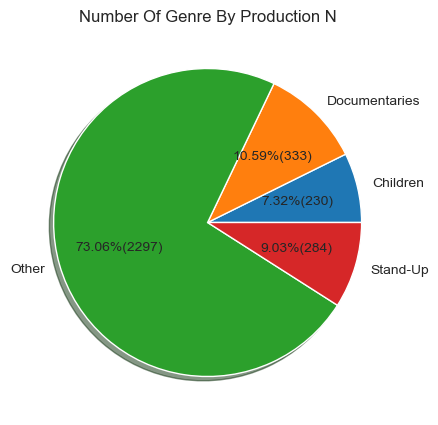

In [119]:
# percentage of production of content added since 2016 by genre for Netflix
netflix_movies_N["genre"].value_counts()
genre_N = netflix_movies_N.groupby("genre").size()
genre_N.plot(kind = "pie", title = "Number Of Genre By Production N", figsize=[5,5], shadow = True, ylabel="",
          autopct=lambda p:"{:.2f}%({:.0f})".format(p,(p/100)*genre_N.sum()))
plt.show()

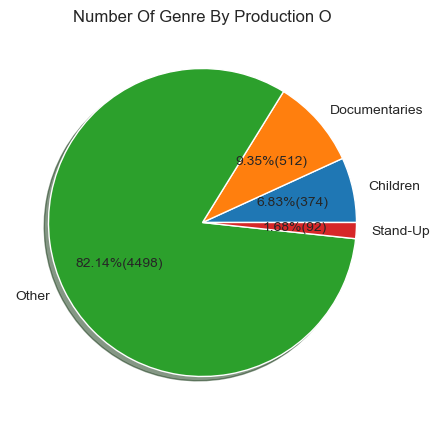

In [120]:
# percentage of production of content added since 2016 by genre for other producer
netflix_movies_O["genre"].value_counts()
genre_O = netflix_movies_O.groupby("genre").size()
genre_O.plot(kind = "pie", title = "Number Of Genre By Production O", figsize=[5,5], shadow = True, ylabel="",
          autopct=lambda p:"{:.2f}%({:.0f})".format(p,(p/100)*genre_O.sum()))
plt.show()

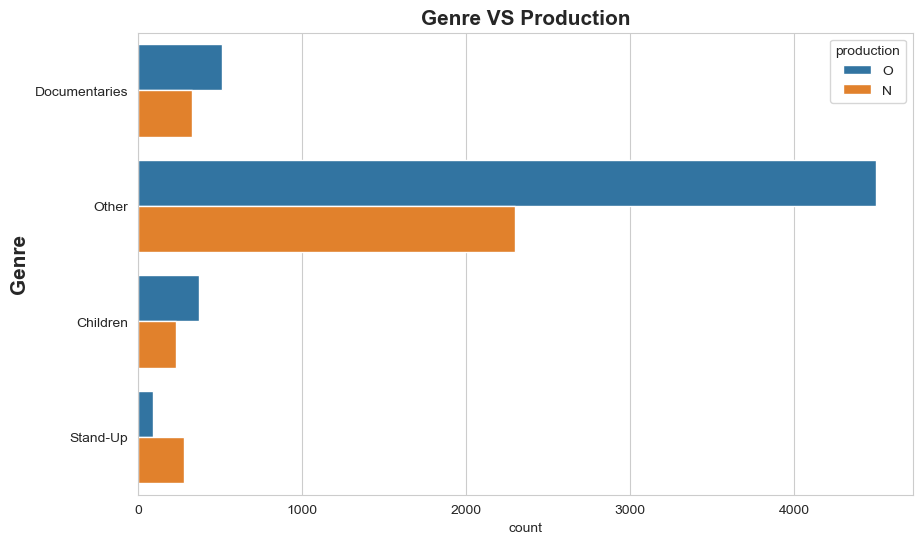

In [121]:
plt.figure(figsize = (10,6))
sns.countplot(y="genre", hue = "production", data = netflix_movies_2016)
plt.title("Genre VS Production", fontweight ='bold', fontsize = 15)
plt.ylabel("Genre", fontweight ='bold', fontsize = 15)
plt.show()

In [122]:
# create new field called year_count
df_after["year_count"] = df_after.apply(lambda x: x["added_year"] - x["release_year"], axis=1)

In [123]:
# show the field
df_after["year_count"]

show_id
s1        1
s2        0
s3        0
s4        0
s5        0
         ..
s8803    12
s8804     1
s8805    10
s8806    14
s8807     4
Name: year_count, Length: 8758, dtype: int64

In [124]:
# apply a function for fill to field year_count
netflix_movies_2016["year_count"] = netflix_movies_2016.apply(lambda x: x["added_year"] - x["release_year"], axis=1)

In [125]:
# apply filter and create new data frame
other_movies = netflix_movies_2016[(netflix_movies_2016["production"] == "O") & (netflix_movies_2016["type"] == "Movie")]

In [126]:
# show statictic for field year_count
other_movies["year_count"].agg(["median","min","max", "mean"])

median    4.000
min      -1.000
max      75.000
mean      8.219
Name: year_count, dtype: float64

In [134]:
other_movies 

,type,title,country,genre,release_year,added_year,production,rating_age,duration,year_count
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,Documentaries,2020,2021,O,Teen,90,1
s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",Other,1993,2021,O,Adults,125,28
s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,Not Specify,Documentaries,2020,2021,O,Adults,67,1
s23,Movie,Avvai Shanmughi,Not Specify,Other,1996,2021,O,Older Kids,161,25
s25,Movie,Jeans,India,Other,1998,2021,O,Teen,166,23
...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,"United Arab Emirates, Jordan",Other,2015,2016,O,Adults,96,1
s8803,Movie,Zodiac,United States,Other,2007,2019,O,Adults,158,12
s8805,Movie,Zombieland,United States,Other,2009,2019,O,Adults,88,10


### Generating Hypotheses

In [127]:
# don't display record before 1970 
# we assumed it was the outlier
short_movies_no_outliers = short_movies[short_movies["release_year"] > 1970]

In [128]:
# we have to regenerate this function because of we assumed records before 1970 were the outlier.
colors = []

# iterate over rows of short_movies
for x, row in short_movies_no_outliers.iterrows() :
    if row["genre"] == "Children":
        colors.append("red")
    elif row["genre"] == "Documentaries":
        colors.append("blue")
    elif row["genre"] == "Stand-Up":
        colors.append("green")
    else:
        colors.append("yellow")
        
# inspect the first 5 values in list        
colors[:5]

['blue', 'red', 'red', 'red', 'yellow']

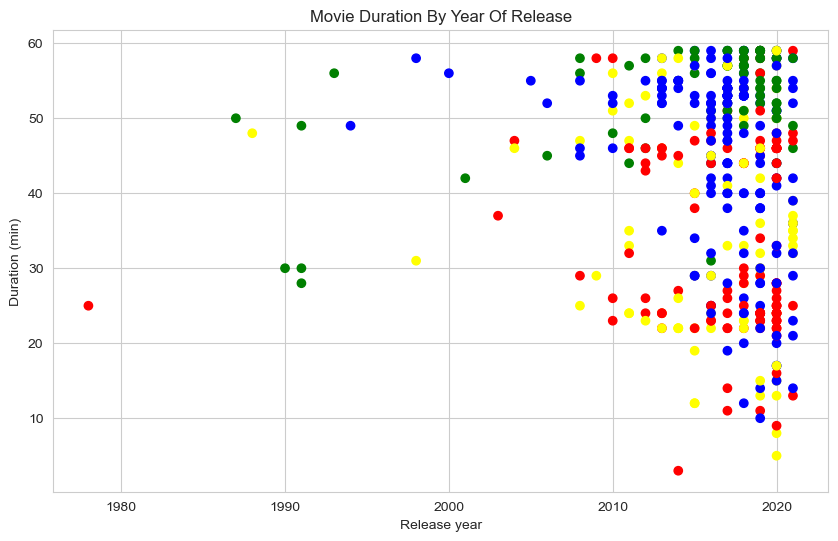

In [129]:
# create a scatter plot of duration versus release_year
plt.scatter(short_movies_no_outliers.release_year, short_movies_no_outliers.duration, color=colors)

# create a title and axis labels
plt.title("Movie Duration By Year Of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# save scatter plot as png
plt.savefig(fname = "grafic2.png")

# show the plot
plt.show()

In [ ]:
# particularly in recent years, there has been an increase in the number of content and genres less than 60 min.
# there has been visibly decrease, movies minimum duration

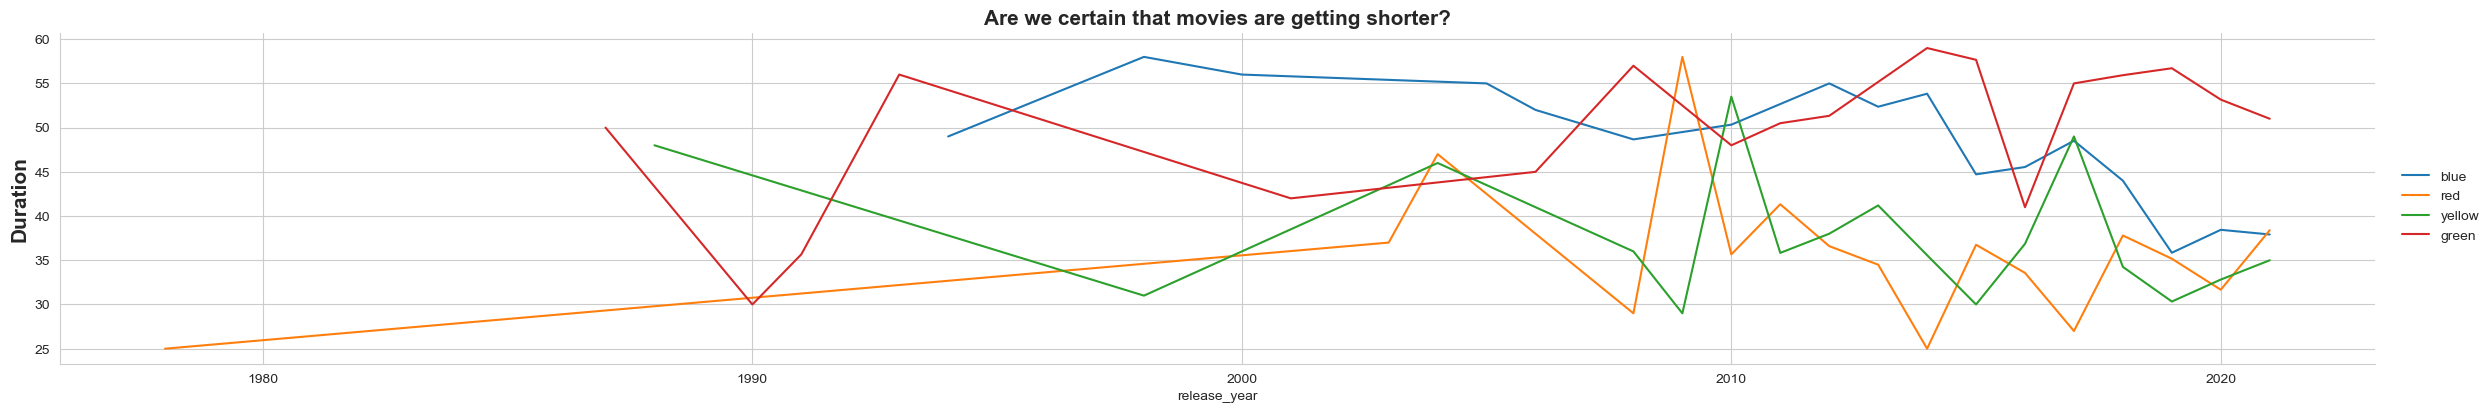

In [130]:
# create a relplot of duration versus release_year
sns.relplot(x="release_year",y="duration", data = short_movies_no_outliers, ci = None, hue = colors, kind = "line", 
            height=4, aspect=6)
plt.title("Are we certain that movies are getting shorter?", fontweight ='bold', fontsize = 15 )
plt.ylabel("Duration", fontweight ='bold', fontsize = 15)
# save relplot as png
plt.savefig(fname="grafic3.png")

# show the plot
plt.show()

In [ ]:
# according to relplot above the line; there has been a decrease in the duration of the children and documentries
# there has been an increase in the duration of the stand up

In [ ]:
# there is no reduction in the average duration of movies
# but there is an increase in the number of movies of less than 60 minutes

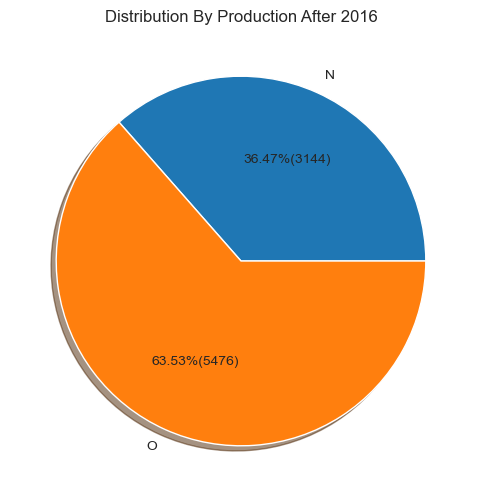

In [131]:
# demonstrate distribution by production after 2016
Type3 = netflix_movies_2016.groupby("production").size()
Type3.plot(kind = "pie", title = "Distribution By Production After 2016", ylabel="", figsize=[10,6], shadow = True,
          autopct=lambda p:"{:.2f}%({:.0f})".format(p,(p/100)*Type3.sum()))

# save pie plot as png
plt.savefig(fname="graphic1.png", transparent = True)

# show pie plot
plt.show()

In [ ]:
# after 2007, Netflix started broadcasting over the internet
# since 2016, there has been a significant increase in the number of movies it has added.

In [ ]:
# after 2016, 
# 63.53 % of the movies on Netflix belong to other producers
# 36.47 % of the movies on Netflix belong to Netflix
# Netflix 729.4% growth in 5 years

In [132]:
netflix_movies_2016 = netflix_movies_2016[(netflix_movies_2016["production"] == "N") & (netflix_movies_2016["type"] == "Movie")]

<AxesSubplot:>

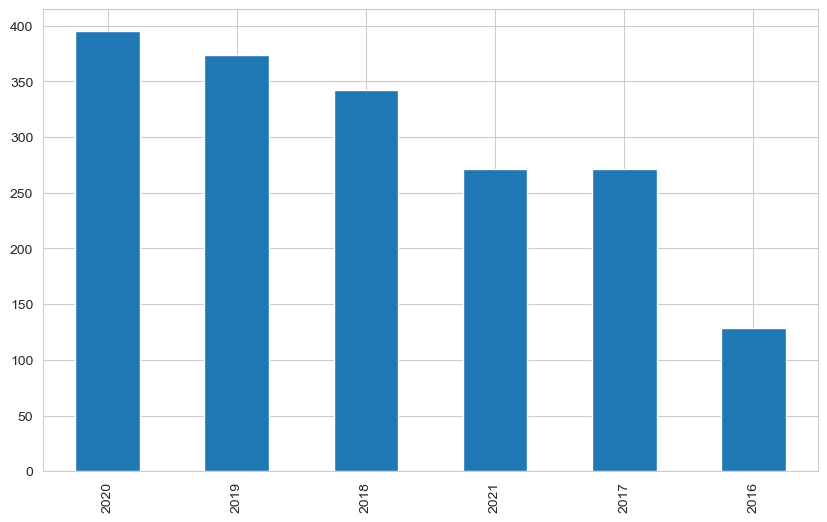

In [133]:
netflix_movies_2016["release_year"].value_counts().plot(kind = "bar", )

In [ ]:
# ************************************************************************************************************************* #

In [ ]:
# The most popular directors to work with in Turkey are "Hakan Algül" and "Yılmaz Erdoğan". 
# "Hakan Algul" 8 movie; "Yılmaz Erdoğan" directed 7 movies and a theater play, most of which he was involved in as an actor.

In [ ]:
# "Demet Akbağ", who acted 13 films in total, worked with 2 different directors who directed the most productions in Turkey 
# in 7 films (one theater play), proved to be the most popular actress by far. 
# Then, respectively, "Cezmi Baskin" and "Salih Kalyon" come.

In [ ]:
# Actors who work closely and are compatible with each other in Turkey are usually actors who have acted together 
# in more than one movie. For example, the most cooperative players in Turkey are "Demet Akbağ" and "Ata Demirer". 
# They have acted in 4 movies together. Ozge Borak and Salih Kalyon, with whom they played together in the same film series 
# (Eyyvah Eyyvah), can be included. As can be seen, although the same actors come together due to the nature of the serial films,
# it is noteworthy that most of these films are in the "comedy" genre.

In [ ]:
# The closest working actor/director pairs in Turkey are typically those with a strong working relationship. 
# For example, the most collaborating actor/director trio in Turkey is "Demet Akbağ", "Ata Demirer" and "Hakan Algül". 
# "They worked together in 4 projects in total.

In [ ]:
# ************************************************************************************************************************* #

In [ ]:
# The most popular directors to work with in the USA are "Martin Scorsese", "Steven Spielberg" and "Robert Rodriguez". 
# "Martin Scorsese" directed 8 movies, "Steven Spielberg" and Robert Rodriguez" directed 6 movies

In [ ]:
# "Adam Sandler" has shown herself to be by far the most popular actor, starring in 20 separate productions. 
# Then, respectively, "Samuel L. Jackson" and "Laura Bailey" come.

In [ ]:
# In the USA, the closest working actor/director pairs are typically those with a strong working relationship. 
# For example, we can mention the compatibility of "Robert De Niro" who also appeared in 4 different Martin Scorsese movies; 
# "Harrison Ford" who also appeared in 4 "Indiana Jones" series movies directed by "Steven Spielberg"; "Alexa Vega" and 
# "Darly Sabara", who also appeared in 4 "Spy Kids" series movies directed by "Robert Rodriguez". Also "Talia Shire", 
# "Burt Young" and "Carl Weathers", who acted together with "Sylvester Stallone" are compatible actors with the director.
# As in the example of Yılmaz Erdoğan in Turkey, "Sylvester Stallone" acted in 3 different "Rocky" films he directed. 
# We can say  there is a strong relationship between Robert De Niro and Martin Scorsese. Because they worked together 
# at least 4 movies and these movies are not a serial type. 

In [ ]:
# In the USA, the closest working and compatible actors are usually those who have acted together in more than one movie. 
# For example, the most collaborative actors in the USA are "Alexa Vega" and "Darly Sabara", who acted together in 4 movies 
# in the "Spy Kids" series. "Antonio Banderas" accompanied them in 3 films of the same film series. "Sylvester Stallone", 
# "Talia Shire", "Burt Young", "Carl Weathers", who acted together in 3 films in the "Rocky" film series; "Keanu Reeves", 
# "Laurence Fishburne", "Carrie-Anne Moss", "Hugo Weaving", who acted together in 3 films in the "Matrix" series and 
# "Will Yun Lee", "Jermaine Love","Rory Markham", "Bertrand-Xavier Corbi" who acted together in 3 films in the "Rogue Warfare" 
# series may be included in . As you can see, due to the nature of serial films, the same actors come together. 
# In the USA, it is possible to say that the genre of serial films in which the actors often act together is in the 
# action/adventure genre, unlike Turkey.

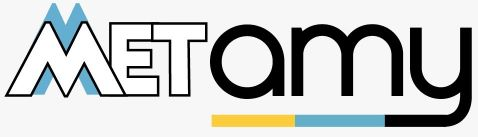